**LIBRERIAS**

In [104]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns


import warnings, requests, zipfile, io
warnings.simplefilter('ignore')
from scipy.io import arff
import joblib as jb

#importo los modelos
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#importo las métricas

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc

#Librerias de validacion cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB

from plotnine import ggplot, aes, geom_bar, theme_classic, theme, element_text


#Bosques
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#! pip install plotnine

**DATOS**

In [ ]:
#Importo los datos desde el url y los muestro
url = 'https://github.com/adiacla/bigdata/raw/master/adult.csv.zip'
df = pd.read_csv(url)
df

age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  \
0                      ?  Not-in-family  White  Female             0   
1        Exec-managerial  Not-in-family  White  Female             0   
2                      ?      Unmarried  Black  Female             0   
3      Machine-op-inspct      Unmarried  White  Female             0   
4         Prof-specialty      Own-child  White  Female             0   
...                  ...            ...    ...     ...           ...   
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital.loss  hours.per.week native.country income  
0              4356              40  United-States  <=50K  
1              4356              18  United-States  <=50K  
2              4356              40  United-States  <=50K  
3              3900              40  United-States  <=50K  
4              3900              40  United-States  <=50K  
...             ...             ...            ...    ...  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  
32560             0              20  United-States  <=50K  

[32561 rows x 15 columns]

**VARIABLES Y ANALISIS DE DATOS|**




In [ ]:
#Creo un diccionario para cambiar los nombres a español
nuevos_nombres = {
    'age': 'edad',
    'workclass': 'clase_trabajo',
    'fnlwgt': 'peso_final',
    'education': 'educacion',
    'education.num': 'num_educacion',
    'marital.status': 'estado_civil',
    'occupation': 'ocupacion',
    'relationship': 'relacion',
    'race': 'raza',
    'sex': 'sexo',
    'capital.gain': 'ganancia_capital',
    'capital.loss': 'pérdida_capital',
    'hours.per.week': 'horas_por_semana',
    'native.country': 'pais_natal',
    'income': 'ingreso'
}


In [ ]:
#Renombro los datos
df.rename(columns=nuevos_nombres, inplace=True)
df.head()

edad clase_trabajo  peso_final     educacion  num_educacion estado_civil  \
0    90             ?       77053       HS-grad              9      Widowed   
1    82       Private      132870       HS-grad              9      Widowed   
2    66             ?      186061  Some-college             10      Widowed   
3    54       Private      140359       7th-8th              4     Divorced   
4    41       Private      264663  Some-college             10    Separated   

           ocupacion       relacion   raza    sexo  ganancia_capital  \
0                  ?  Not-in-family  White  Female                 0   
1    Exec-managerial  Not-in-family  White  Female                 0   
2                  ?      Unmarried  Black  Female                 0   
3  Machine-op-inspct      Unmarried  White  Female                 0   
4     Prof-specialty      Own-child  White  Female                 0   

   pérdida_capital  horas_por_semana     pais_natal ingreso  
0             4356                40  United-States   <=50K  
1             4356                18  United-States   <=50K  
2             4356                40  United-States   <=50K  
3             3900                40  United-States   <=50K  
4             3900                40  United-States   <=50K

In [ ]:
#Reviso los tipos de datos
df.dtypes

edad                 int64
clase_trabajo       object
peso_final           int64
educacion           object
num_educacion        int64
estado_civil        object
ocupacion           object
relacion            object
raza                object
sexo                object
ganancia_capital     int64
pérdida_capital      int64
horas_por_semana     int64
pais_natal          object
ingreso             object
dtype: object

In [ ]:
#Tamaño del dataframe
df.shape

(32561, 15)

In [ ]:

#Se revisa que cantidad de valores unicos tiene los feature de tipo object
columnas_object = df.select_dtypes(include=['object']).columns

for columna in columnas_object:
    conteo_valores = df[columna].value_counts()
    print(f"Conteo de valores únicos en la columna '{columna}':")
    print(conteo_valores)
    print()

Conteo de valores únicos en la columna 'clase_trabajo':
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: clase_trabajo, dtype: int64

Conteo de valores únicos en la columna 'educacion':
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: educacion, dtype: int64

Conteo de valores únicos en la columna 'estado_civil':
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418

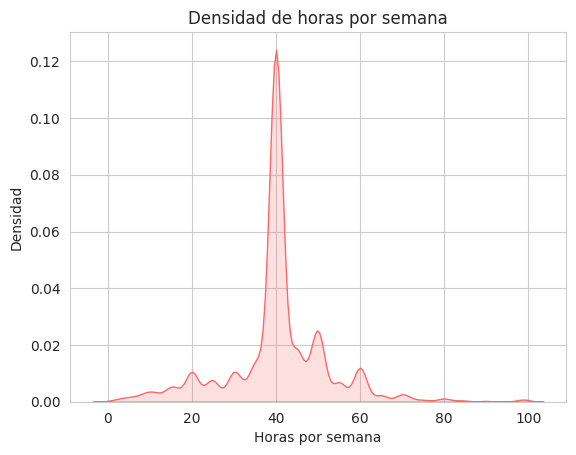

In [ ]:
# Establecer el estilo de seaborn
sns.set_style("whitegrid")

# Crear el gráfico de densidad
sns.kdeplot(data=df, x='horas_por_semana', fill=True, alpha=0.2, color="#FF6666")

# Añadir título y etiquetas de los ejes
plt.title("Densidad de horas por semana")
plt.xlabel("Horas por semana")
plt.ylabel("Densidad")

# Mostrar el gráfico
plt.show()

Text(0, 0.5, 'Frecuencia')

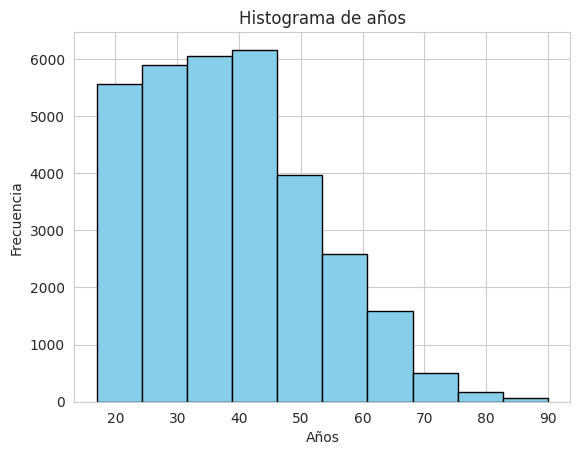

In [ ]:
# Crear el histograma
plt.hist(df['edad'], bins=10, color='skyblue', edgecolor='black')

# Añadir título y etiquetas de los ejes
plt.title('Histograma de años')
plt.xlabel('Años')
plt.ylabel('Frecuencia')



A partir del histograma se visualiza que la mayoria de los encuestados tienen entre 30 y 30 años

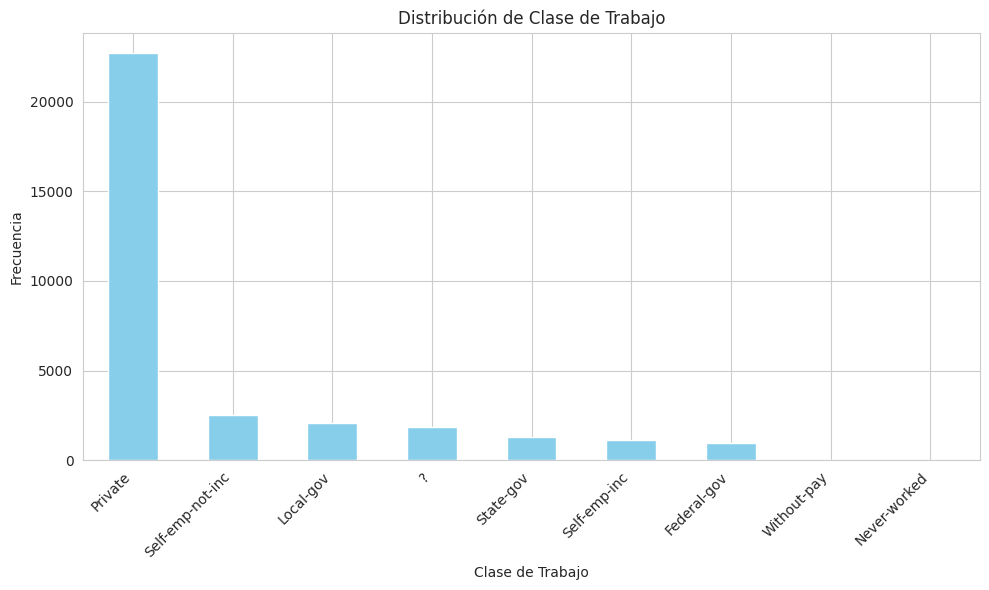

In [ ]:
tabla_frecuencia = df['clase_trabajo'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
tabla_frecuencia.plot(kind='bar', color='skyblue')

# Añadir título y etiquetas de los ejes
plt.title('Distribución de Clase de Trabajo')
plt.xlabel('Clase de Trabajo')
plt.ylabel('Frecuencia')

# Rotar los nombres de las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

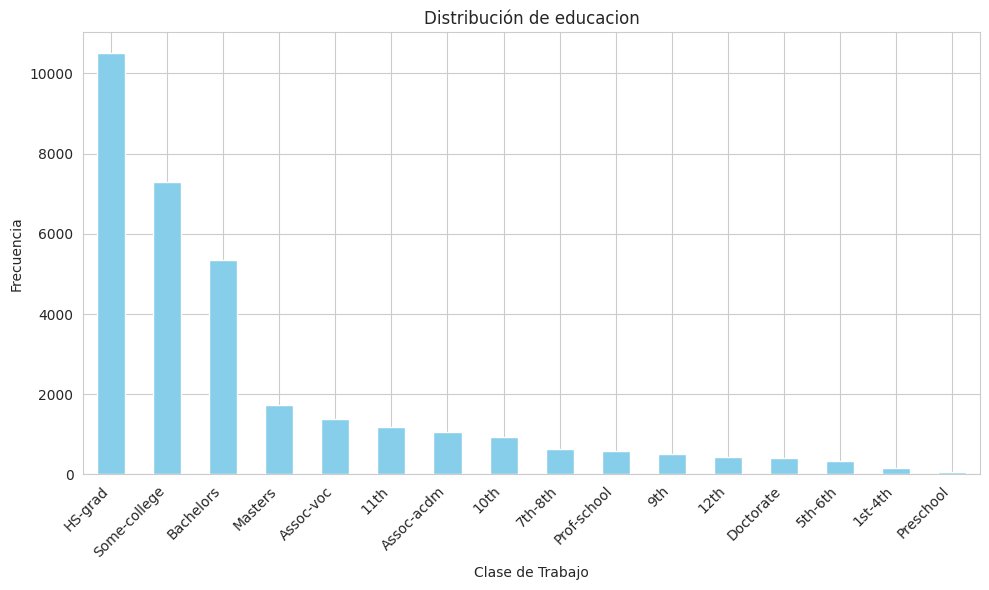

In [ ]:
tabla_frecuencia = df['educacion'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
tabla_frecuencia.plot(kind='bar', color='skyblue')

# Añadir título y etiquetas de los ejes
plt.title('Distribución de educacion')
plt.xlabel('Clase de Trabajo')
plt.ylabel('Frecuencia')

# Rotar los nombres de las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

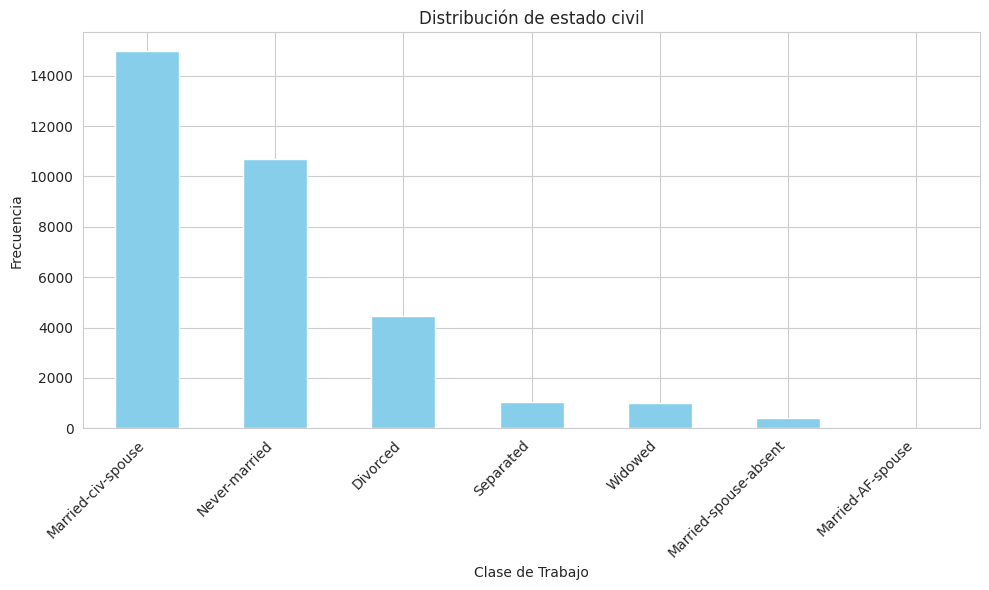

In [ ]:
tabla_frecuencia = df['estado_civil'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
tabla_frecuencia.plot(kind='bar', color='skyblue')

# Añadir título y etiquetas de los ejes
plt.title('Distribución de estado civil')
plt.xlabel('Clase de Trabajo')
plt.ylabel('Frecuencia')

# Rotar los nombres de las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

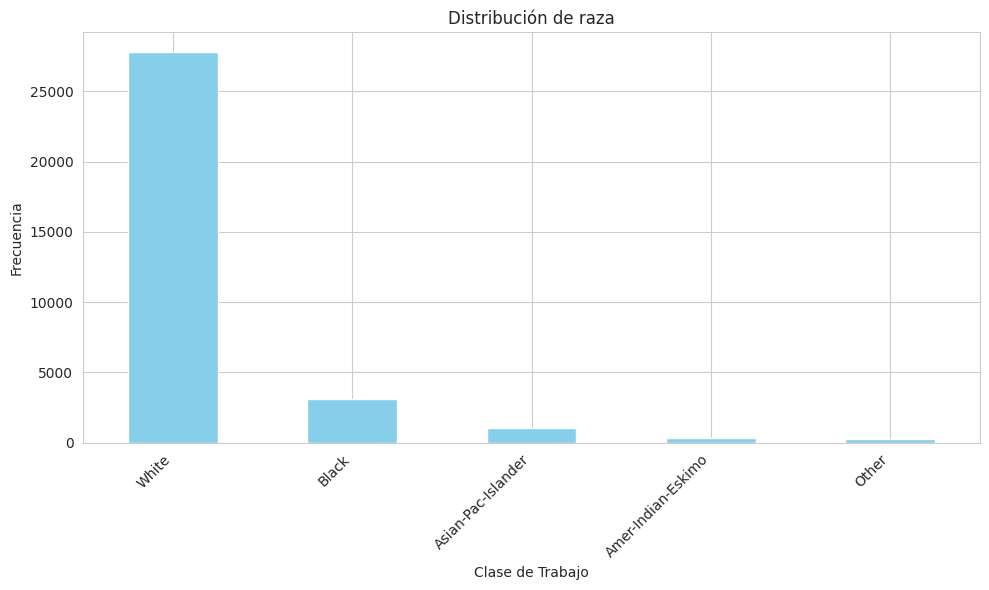

In [ ]:
tabla_frecuencia = df['raza'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
tabla_frecuencia.plot(kind='bar', color='skyblue')

# Añadir título y etiquetas de los ejes
plt.title('Distribución de raza')
plt.xlabel('Clase de Trabajo')
plt.ylabel('Frecuencia')

# Rotar los nombres de las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

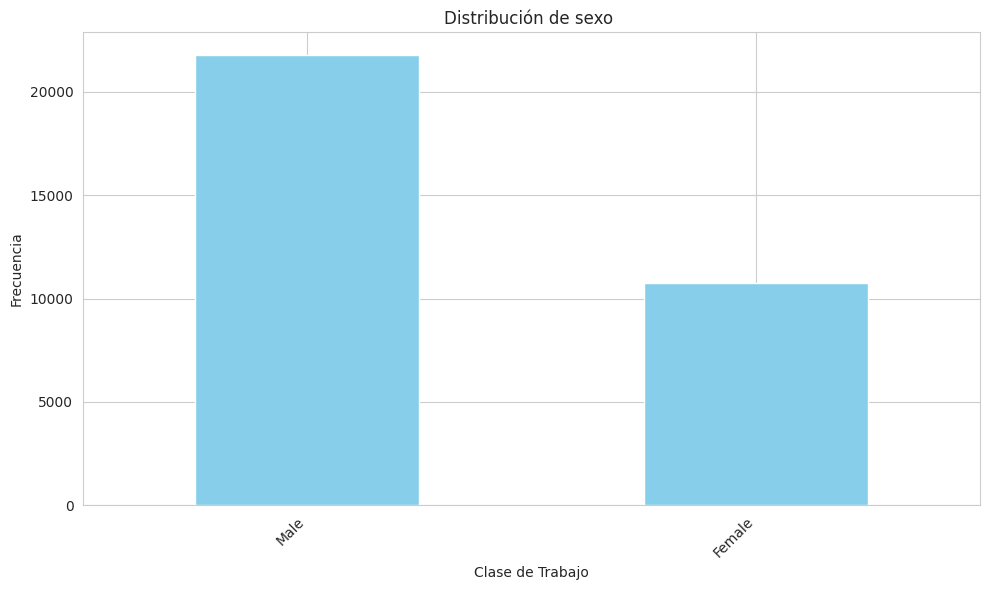

In [ ]:
tabla_frecuencia = df['sexo'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
tabla_frecuencia.plot(kind='bar', color='skyblue')

# Añadir título y etiquetas de los ejes
plt.title('Distribución de sexo ')
plt.xlabel('Clase de Trabajo')
plt.ylabel('Frecuencia')

# Rotar los nombres de las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

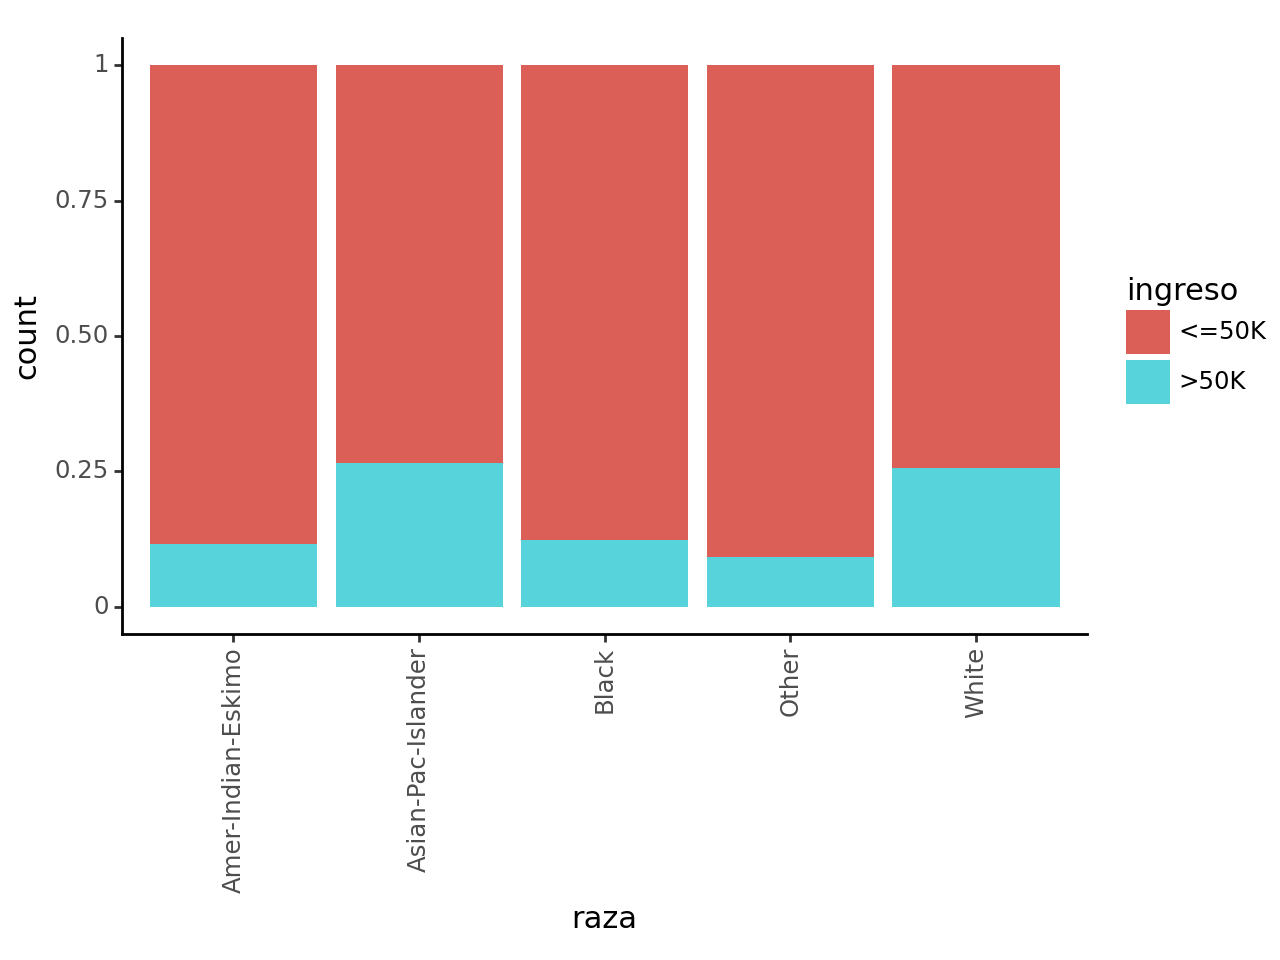

<Figure Size: (640 x 480)>

In [ ]:
(
    ggplot(df, aes(x='raza', fill='ingreso')) +
    geom_bar(position='fill') +
    theme_classic() +
    theme(axis_text_x=element_text(angle=90))
)

A partir del grafico se puede analizar que la raza "asian" y "white" son los que mejor tienen ingresos

In [ ]:
#Conteo de mi target class
df['ingreso'].value_counts()

<=50K    24720
>50K      7841
Name: ingreso, dtype: int64

In [ ]:
#Se usa para ver datos importantes como mediana , media , valores maximos y minimos de los features
df.describe()

edad    peso_final  num_educacion  ganancia_capital  \
count  32561.000000  3.256100e+04   32561.000000      32561.000000   
mean      38.581647  1.897784e+05      10.080679       1077.648844   
std       13.640433  1.055500e+05       2.572720       7385.292085   
min       17.000000  1.228500e+04       1.000000          0.000000   
25%       28.000000  1.178270e+05       9.000000          0.000000   
50%       37.000000  1.783560e+05      10.000000          0.000000   
75%       48.000000  2.370510e+05      12.000000          0.000000   
max       90.000000  1.484705e+06      16.000000      99999.000000   

       pérdida_capital  horas_por_semana  
count     32561.000000      32561.000000  
mean         87.303830         40.437456  
std         402.960219         12.347429  
min           0.000000          1.000000  
25%           0.000000         40.000000  
50%           0.000000         40.000000  
75%           0.000000         45.000000  
max        4356.000000         99.000000

In [ ]:
#Columnas de mi dataframe
df.columns

Index(['edad', 'clase_trabajo', 'peso_final', 'educacion', 'num_educacion',
       'estado_civil', 'ocupacion', 'relacion', 'raza', 'sexo',
       'ganancia_capital', 'pérdida_capital', 'horas_por_semana', 'pais_natal',
       'ingreso'],
      dtype='object')


**INGENIERIA DE DATOS**

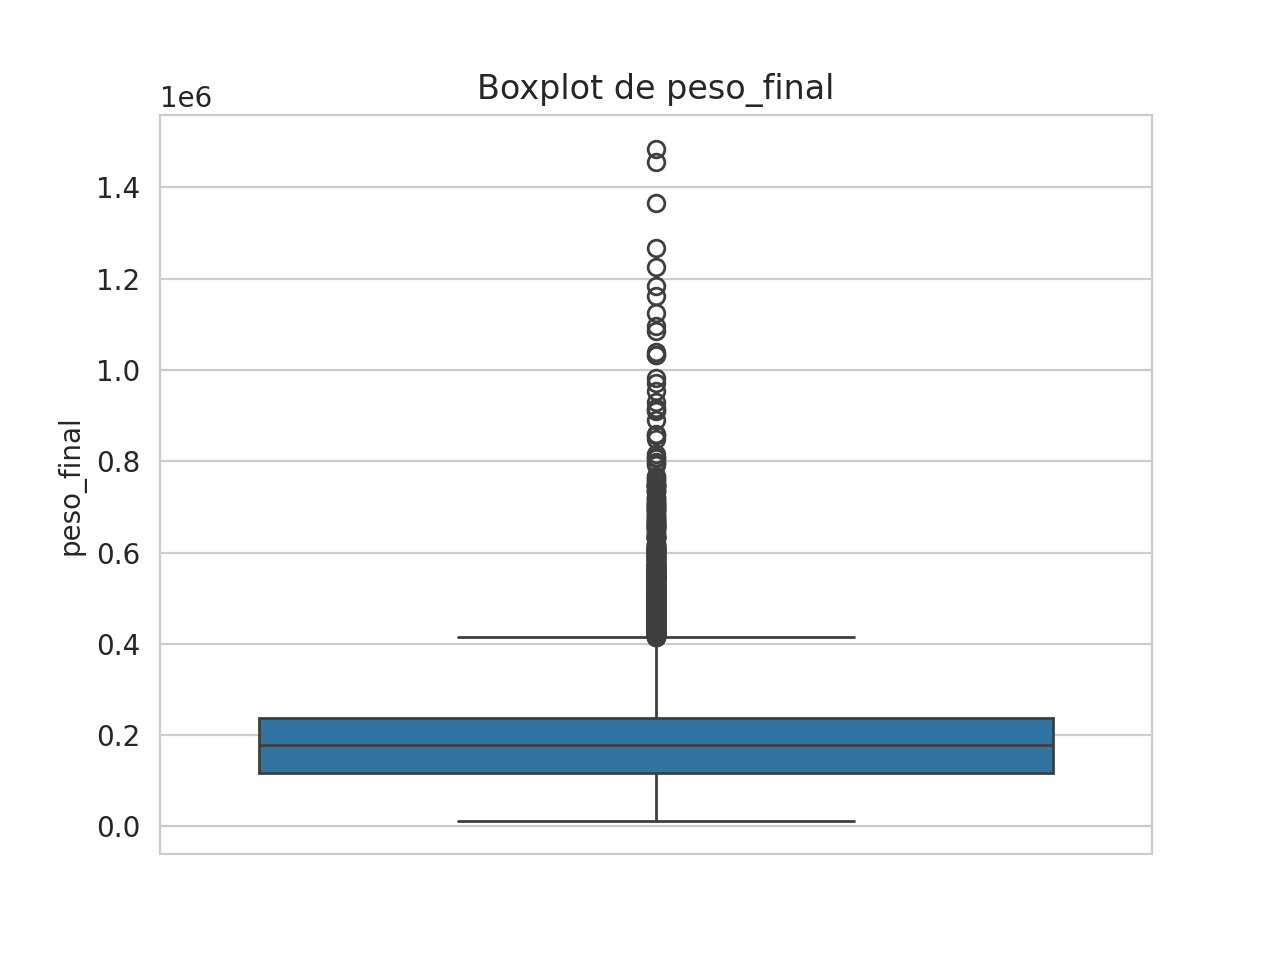

In [ ]:
# Crear el gráfico de caja utilizando seaborn
sns.boxplot(data=df, y='peso_final')

# Añadir título al gráfico
plt.title('Boxplot de peso_final')

# Mostrar el gráfico
plt.show()

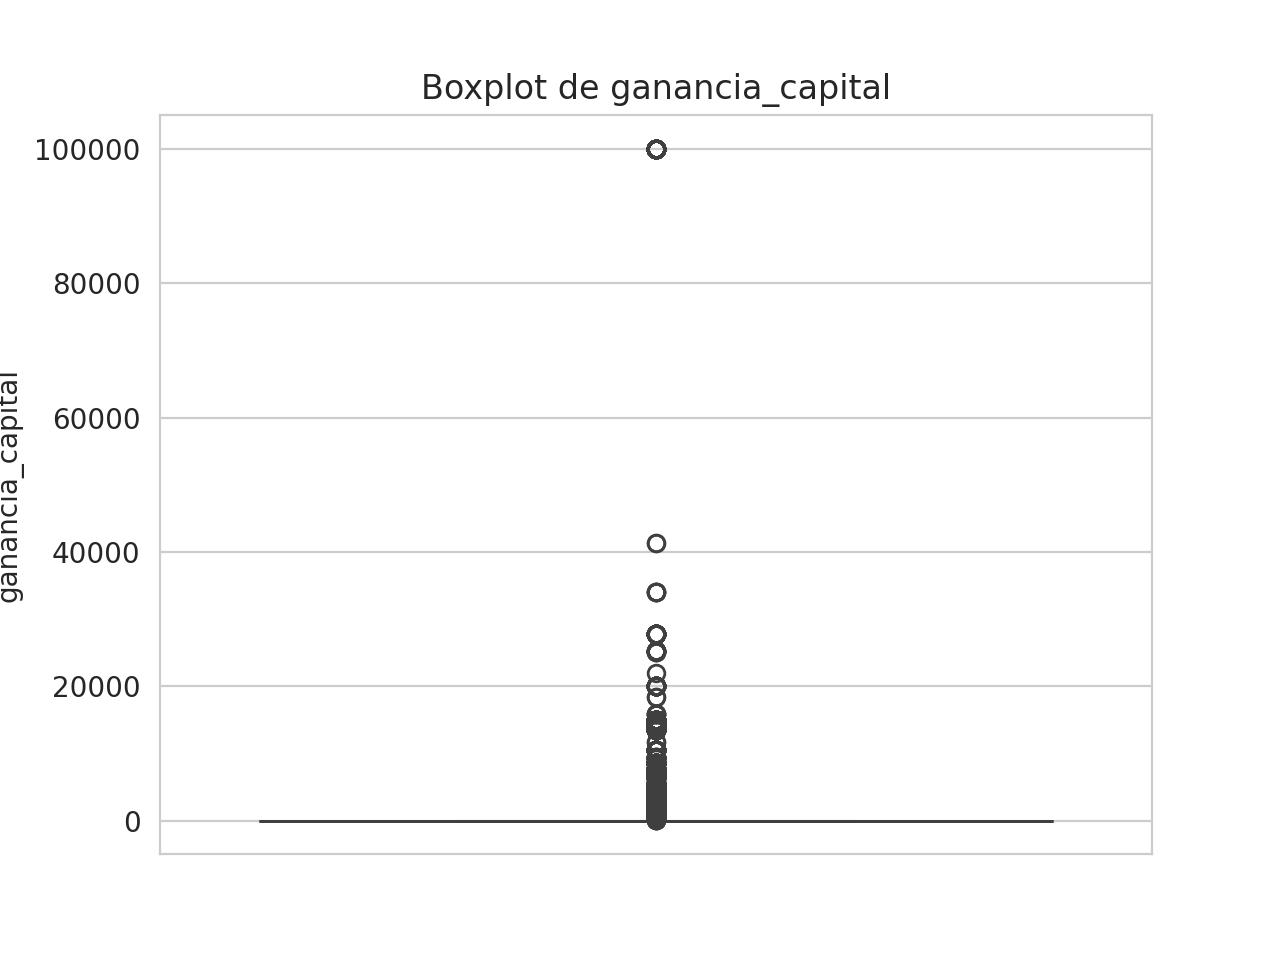

In [ ]:
# Crear el gráfico de caja utilizando seaborn
sns.boxplot(data=df, y='ganancia_capital')

# Añadir título al gráfico
plt.title('Boxplot de ganancia_capital')

# Mostrar el gráfico
plt.show()

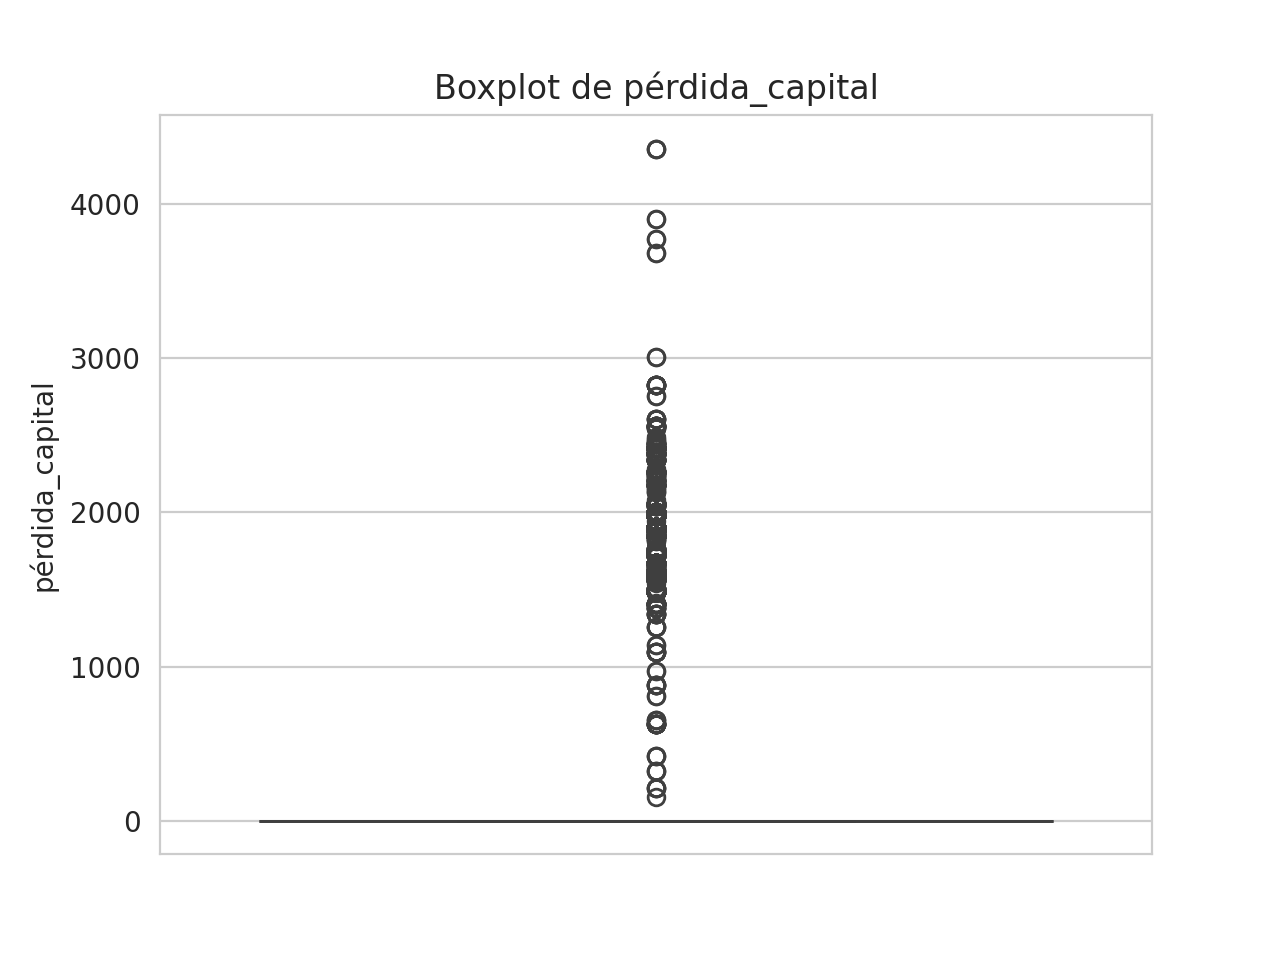

In [ ]:
# Crear el gráfico de caja utilizando seaborn
sns.boxplot(data=df, y='pérdida_capital')

# Añadir título al gráfico
plt.title('Boxplot de pérdida_capital')

# Mostrar el gráfico
plt.show()

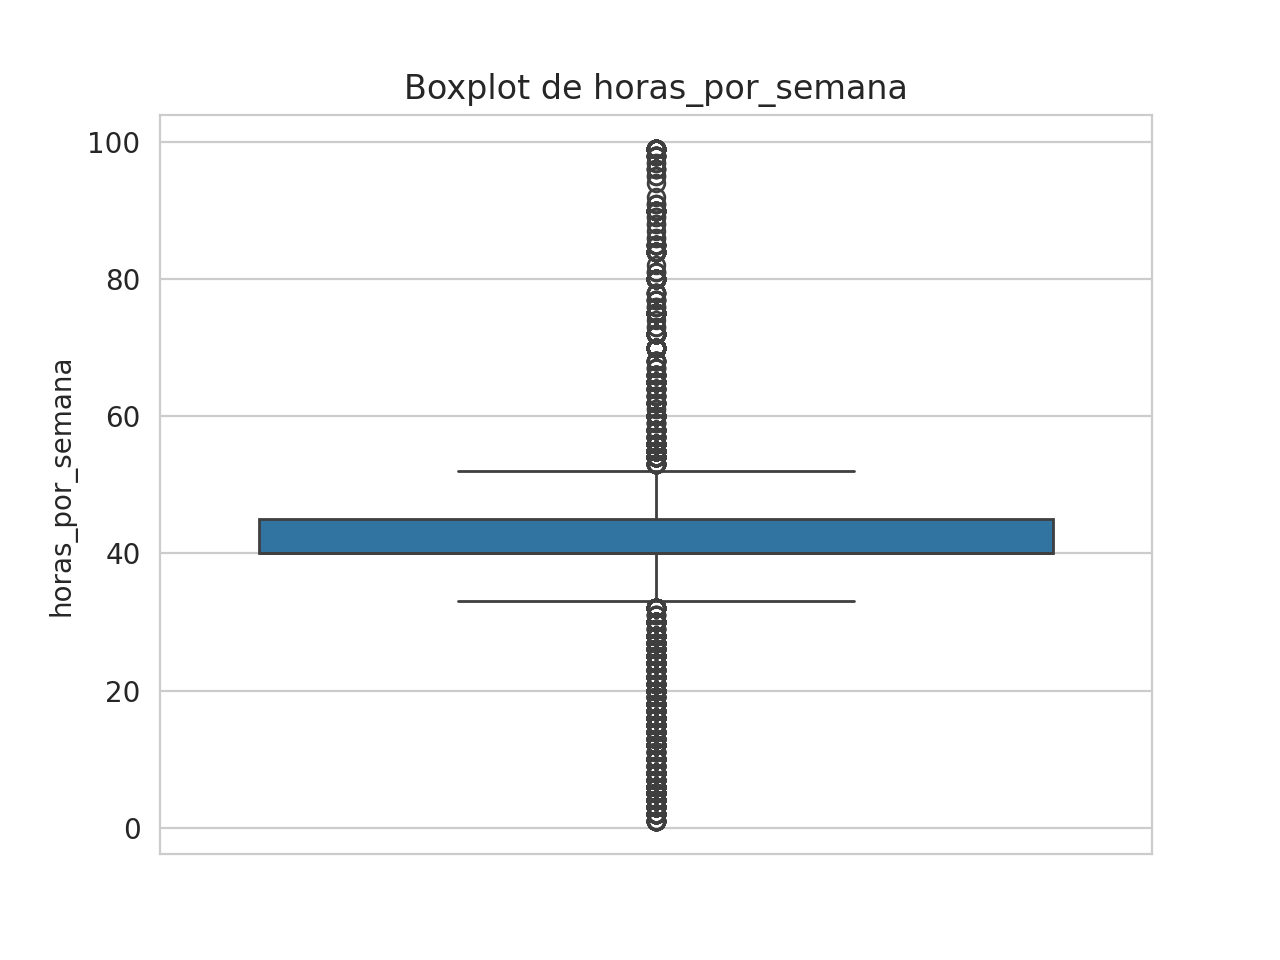

In [ ]:
# Crear el gráfico de caja utilizando seaborn
sns.boxplot(data=df, y='horas_por_semana')

# Añadir título al gráfico
plt.title('Boxplot de horas_por_semana')

# Mostrar el gráfico
plt.show()

In [ ]:
df.drop('ganancia_capital', axis=1, inplace=True)

In [ ]:

df.drop('pérdida_capital', axis=1, inplace=True)

In [ ]:
df.drop('peso_final', axis=1, inplace=True)

In [ ]:
df.drop('educacion', axis=1, inplace=True)

In [ ]:
df.describe()

edad  num_educacion  horas_por_semana
count  32561.000000   32561.000000      32561.000000
mean      38.581647      10.080679         40.437456
std       13.640433       2.572720         12.347429
min       17.000000       1.000000          1.000000
25%       28.000000       9.000000         40.000000
50%       37.000000      10.000000         40.000000
75%       48.000000      12.000000         45.000000
max       90.000000      16.000000         99.000000

In [ ]:
# Calcula la matriz de correlación
correlation_matrix = df[['edad', 'num_educacion', 'horas_por_semana']].corr()

# Imprime la matriz de correlación
print(correlation_matrix)

#Nos damos cuenta que las variables numericas estan poco relacionadas

                      edad  num_educacion  horas_por_semana
edad              1.000000       0.036527          0.068756
num_educacion     0.036527       1.000000          0.148123
horas_por_semana  0.068756       0.148123          1.000000


In [ ]:
df.describe()

edad  num_educacion  horas_por_semana
count  32561.000000   32561.000000      32561.000000
mean      38.581647      10.080679         40.437456
std       13.640433       2.572720         12.347429
min       17.000000       1.000000          1.000000
25%       28.000000       9.000000         40.000000
50%       37.000000      10.000000         40.000000
75%       48.000000      12.000000         45.000000
max       90.000000      16.000000         99.000000

In [ ]:
# Reemplazar '?' con NaN en todo el DataFrame
df.replace('?', np.nan, inplace=True)

In [ ]:
summary = df.apply(pd.Series.value_counts).fillna(0)

# Mostramos la tabla con el formato deseado
for column in summary.columns:
    print(column)
    print(summary[column].astype(int).astype(str) + ' : ' + summary.index.astype(str))
    print()

edad
1                        0 : 1
2                        0 : 2
3                        0 : 3
4                        0 : 4
5                        0 : 5
                    ...       
White                0 : White
Widowed            0 : Widowed
Wife                  0 : Wife
Without-pay    0 : Without-pay
Yugoslavia      0 : Yugoslavia
Length: 183, dtype: object

clase_trabajo
1                         0 : 1
2                         0 : 2
3                         0 : 3
4                         0 : 4
5                         0 : 5
                     ...       
White                 0 : White
Widowed             0 : Widowed
Wife                   0 : Wife
Without-pay    14 : Without-pay
Yugoslavia       0 : Yugoslavia
Length: 183, dtype: object

num_educacion
1                       51 : 1
2                      168 : 2
3                      333 : 3
4                      646 : 4
5                      514 : 5
                    ...       
White                0 : White
W

In [ ]:
# Definir el diccionario de recodificación para el estatus laboral
recode_dict = {
    "Private": "privado",
    "Self-emp-not-inc": "autonomo",
    "Local-gov": "funcionario",
    "State-gov": "funcionario",
    "Self-emp-inc": "autonomo",
    "Federal-gov": "funcionario",
    "Without-pay": "desempleado",
    "Never-worked": "desempleado"
}

# Recodificar la columna 'clase_trabajo' utilizando el diccionario de mapeo
df['clase_trabajo'] = df['clase_trabajo'].replace(recode_dict)



In [ ]:
df['clase_trabajo'].value_counts()

privado        22696
funcionario     4351
autonomo        3657
desempleado       21
Name: clase_trabajo, dtype: int64

In [ ]:
# Definir el diccionario de recodificación para el estado civil
recode_dict = {
    "Married-AF-spouse": "casado",
    "Married-civ-spouse": "casado",
    "Married-spouse-absent": "casado",
    "Widowed": "separado",
    "Never-married": "soltero",
    "Separated": "separado",
    "Divorced": "separado"
}

# Recodificar la columna 'marital_status' utilizando el diccionario de mapeo
df['estado_civil'] = df['estado_civil'].replace(recode_dict)

In [ ]:
df['estado_civil'].value_counts()

casado      15417
soltero     10683
separado     6461
Name: estado_civil, dtype: int64

In [ ]:
df['pais_natal'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [ ]:
# Define el diccionario de mapeo actualizado para el lugar de nacimiento
mapeo_paises = {
    "United-States": "Norte America",
    "Mexico": "Norte America",
    "Philippines": "Asia",
    "Germany": "Europa",
    "Canada": "Norte America",
    "Puerto-Rico": "Norte America",
    "El-Salvador": "Norte America",
    "India": "Asia",
    "Cuba": "Norte America",
    "England": "Europa",
    "Jamaica": "Norte America",
    "South": "Otros",
    "China": "Asia",
    "Italy": "Europa",
    "Dominican-Republic": "Norte America",
    "Vietnam": "Asia",
    "Guatemala": "Norte America",
    "Japan": "Asia",
    "Poland": "Europa",
    "Columbia": "Sur America",
    "Taiwan": "Asia",
    "Haiti": "Norte America",
    "Iran": "Asia",
    "Portugal": "Europa",
    "Nicaragua": "Norte America",
    "Peru": "Sur America",
    "Greece": "Europa",
    "France": "Europa",
    "Ecuador": "Sur America",
    "Ireland": "Europa",
    "Hong": "Asia",
    "Trinadad&Tobago": "Norte America",
    "Cambodia": "Asia",
    "Thailand": "Asia",
    "Laos": "Asia",
    "Yugoslavia": "Europa",
    "Outlying-US(Guam-USVI-etc)": "Norte America",
    "Hungary": "Europa",
    "Honduras": "Norte America",
    "Scotland": "Europa",
    "Holand-Netherlands": "Europa"
}

# Aplica el mapeo a la columna 'native_country' en tu DataFrame
df['pais_natal'] = df['pais_natal'].map(mapeo_paises)




In [ ]:
df.loc[df['ingreso'] == "<=50K", ['ingreso']] = 1
df.loc[df['ingreso'] == ">50K", ['ingreso']] = 0

In [ ]:
df.head()

edad clase_trabajo  num_educacion estado_civil          ocupacion  \
0    90           NaN              9     separado                NaN   
1    82       privado              9     separado    Exec-managerial   
2    66           NaN             10     separado                NaN   
3    54       privado              4     separado  Machine-op-inspct   
4    41       privado             10     separado     Prof-specialty   

        relacion   raza    sexo  horas_por_semana     pais_natal ingreso  
0  Not-in-family  White  Female                40  Norte America       1  
1  Not-in-family  White  Female                18  Norte America       1  
2      Unmarried  Black  Female                40  Norte America       1  
3      Unmarried  White  Female                40  Norte America       1  
4      Own-child  White  Female                40  Norte America       1

Text(0.5, 0.98, 'Box Plot de todos los Feature')

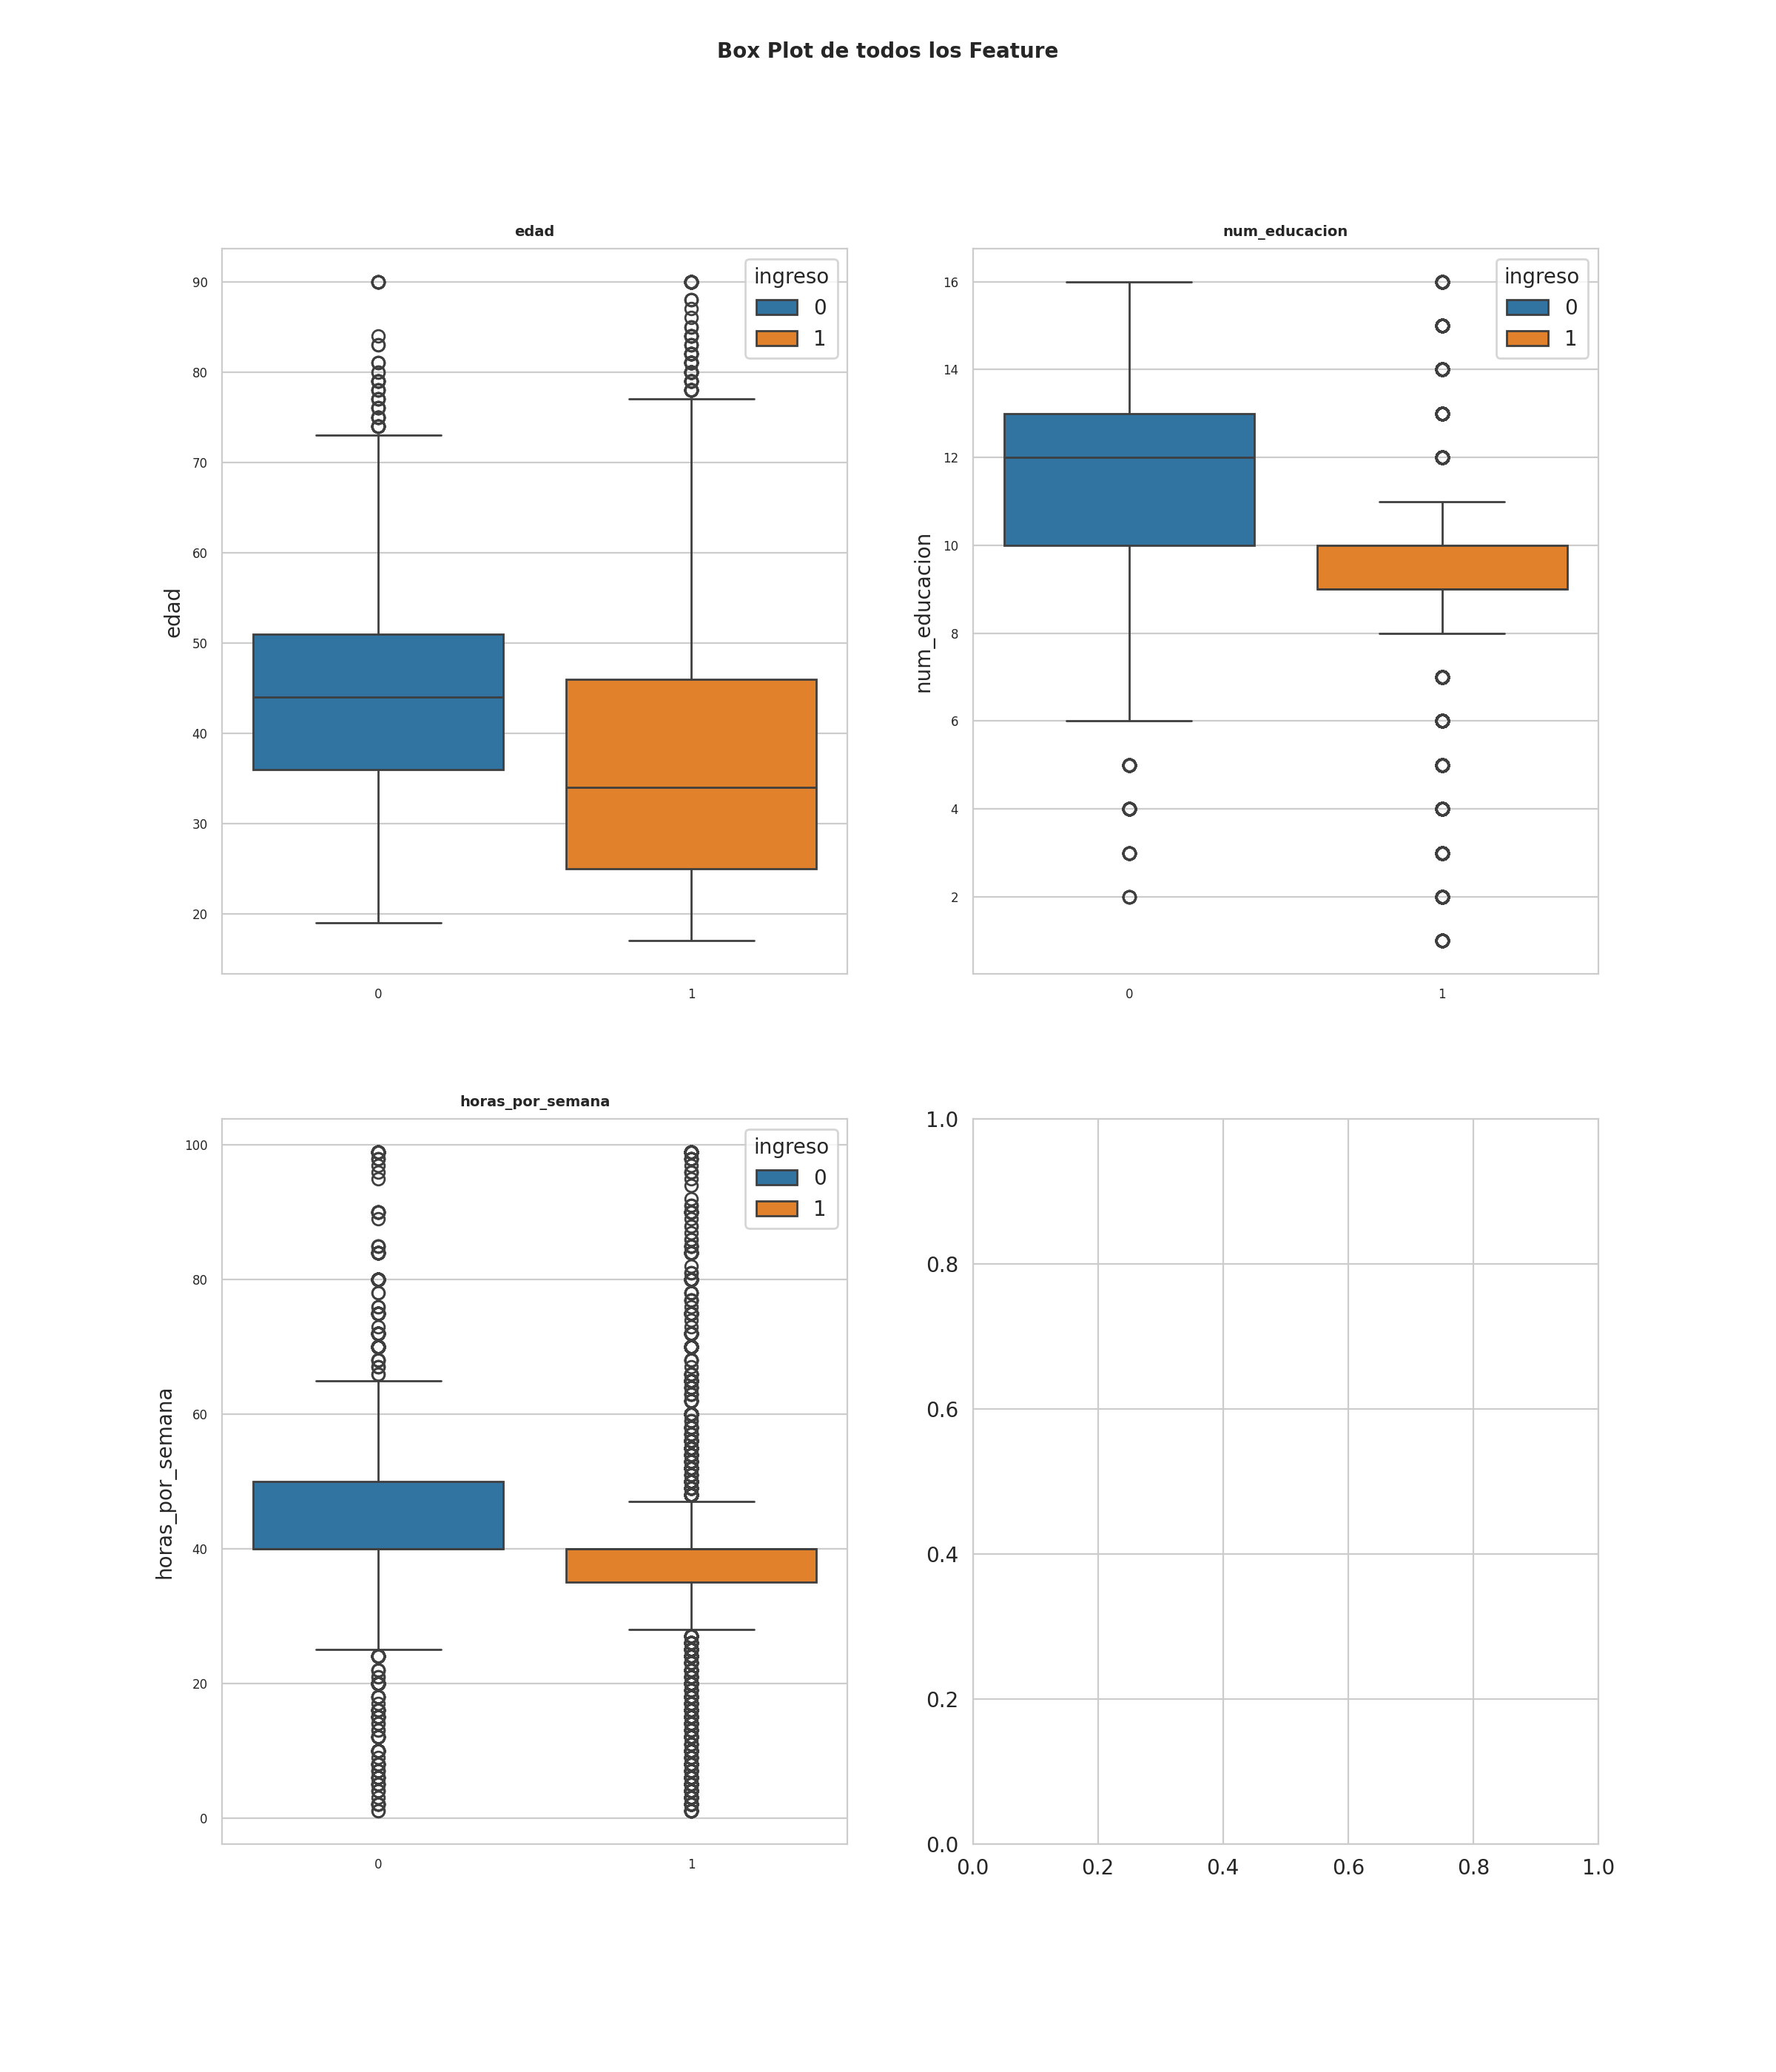

In [ ]:
columnas=df.select_dtypes(include='int').columns
df.dropna(subset=columnas, inplace=True)


fig,axes=plt.subplots(nrows=2, ncols=2, figsize=(12,14))
axes=axes.flat

for i,columna in enumerate(columnas):
  sns.boxplot(x='ingreso', y=columna, data=df, hue='ingreso',ax=axes[i])
  axes[i].set_title(columna,fontsize=7,fontweight="bold")
  axes[i].tick_params(labelsize=6)
  axes[i].set_xlabel("")

fig.suptitle("Box Plot de todos los Feature", fontsize=10, fontweight="bold")


In [ ]:
df = df.drop(df[df['edad']>75].index)
df = df.reset_index(drop=True)

In [ ]:
df = df.drop(df[df['horas_por_semana']>65].index)
df = df.reset_index(drop=True)

In [ ]:
df = df.drop(df[df['horas_por_semana']<20].index)
df = df.reset_index(drop=True)

In [ ]:
columnas

Index(['edad', 'num_educacion', 'horas_por_semana'], dtype='object')

# **MODELO NAIVE BAYES**
Este modelo se utiliza para clasificar instancias en clases diferentes basándose en la probabilidad condicional de las características dadas las clases, asumiendo independencia condicional entre las características.

In [ ]:
X = df.drop(columns=['ingreso'])
y = df['ingreso']

In [ ]:
# Codificar variables categóricas
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=340)

In [ ]:
y_train = y_train.astype(int)

In [ ]:
y_test=y_test.astype(int)

In [ ]:
# Construir y entrenar el modelo de clasificación Naive Bayes
modeloNB = CategoricalNB()
modeloNB.fit(X_train, y_train)

CategoricalNB()

In [ ]:
import joblib as jb
jb.dump(modeloNB, "modeloNB.bin", compress=True)

['modeloNB.bin']

In [ ]:
y_predict = modeloNB.predict(X_test)

In [ ]:
probabilidad=modeloNB.predict_proba(X_test)

In [ ]:
y_test=y_test.values

In [ ]:
modeloNB.score(X_test,y_test)

0.8048862115127176

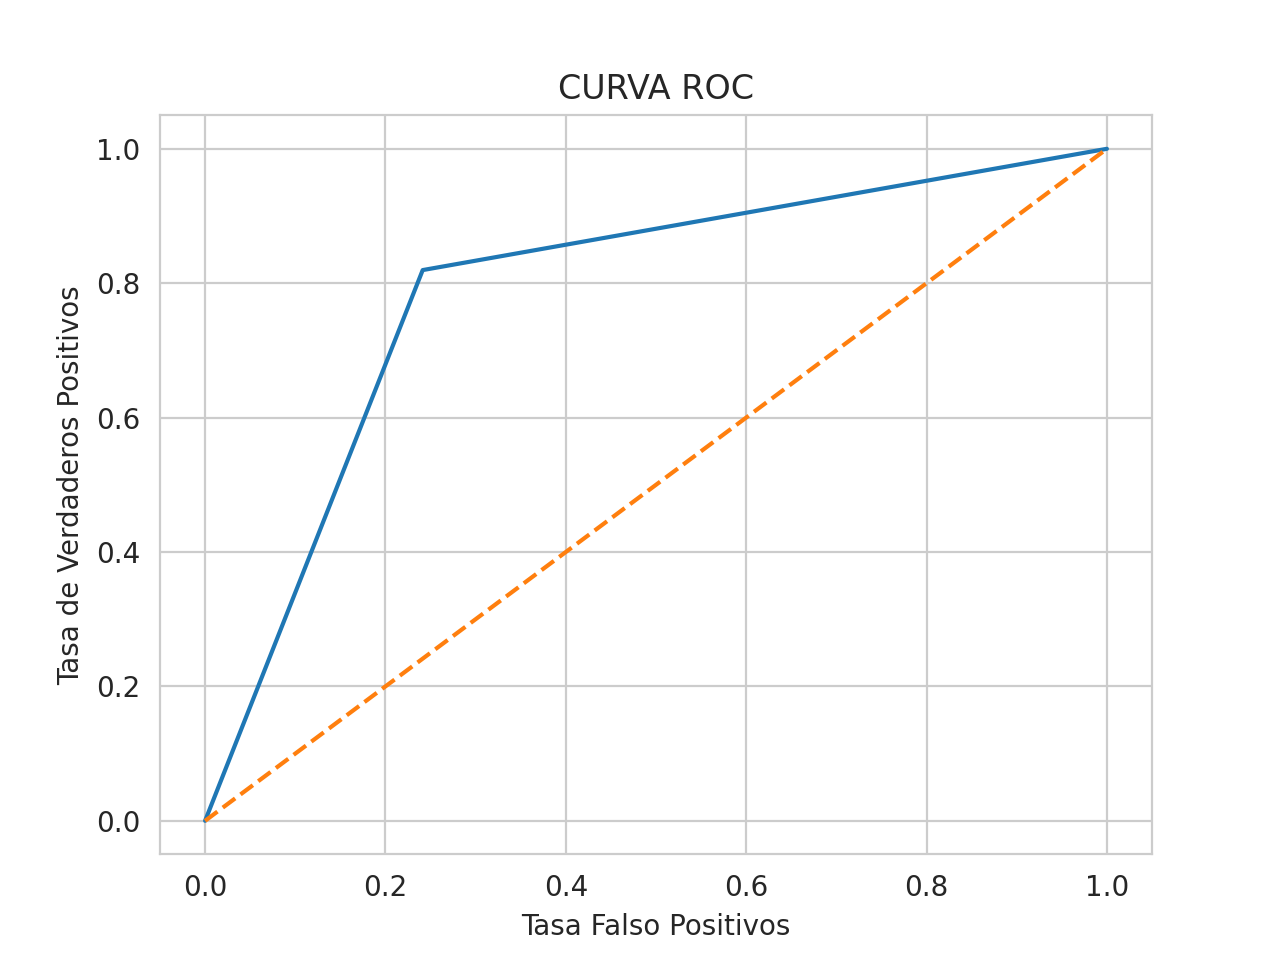

In [ ]:
fpr,tpr,umbral=roc_curve(y_test,y_predict)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"--")
plt.xlabel("Tasa Falso Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("CURVA ROC")
plt.show()

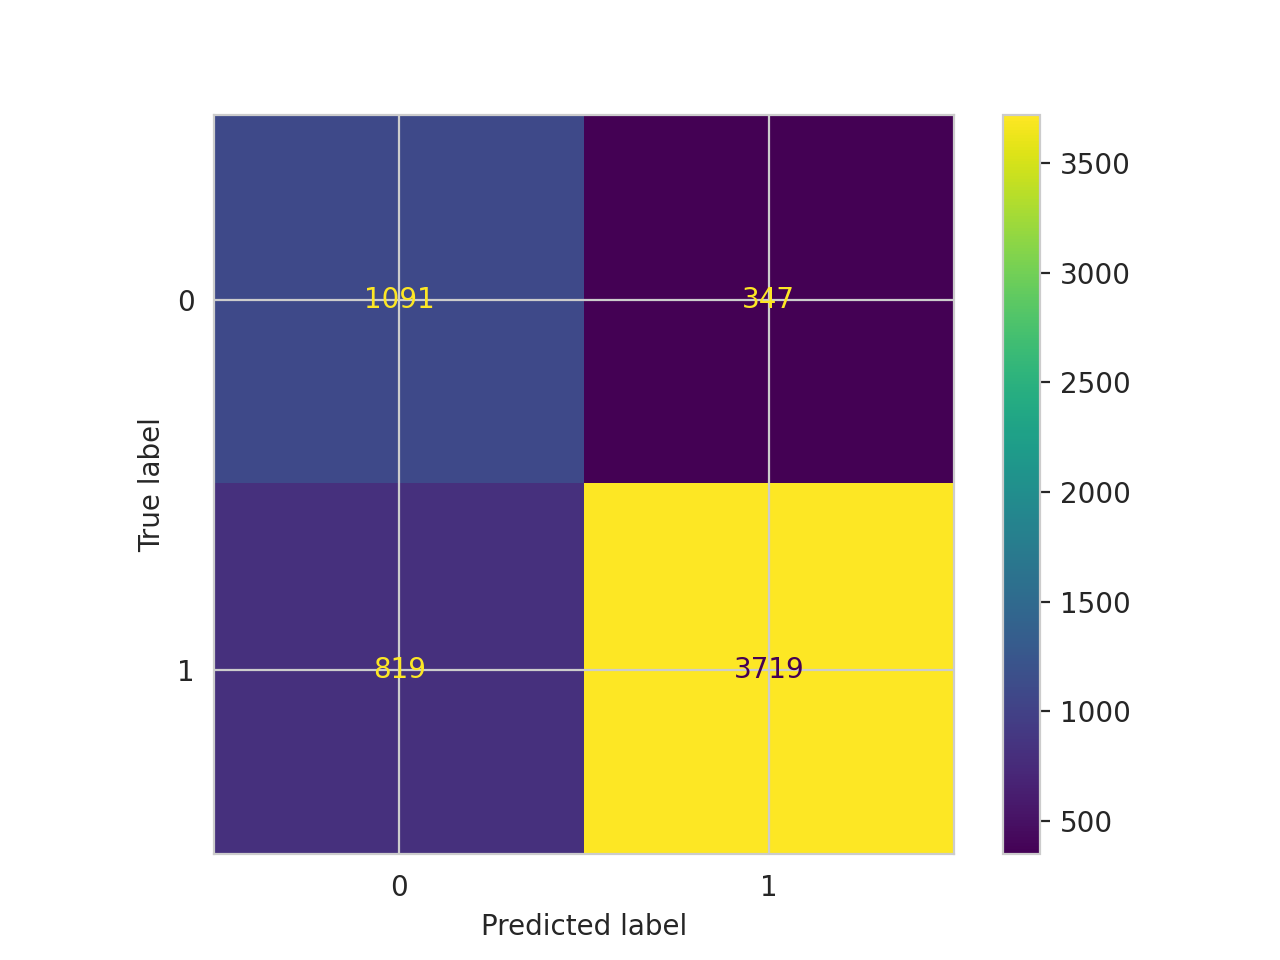

In [ ]:
matrix=confusion_matrix(y_test,y_predict)
mostrarMatrix=ConfusionMatrixDisplay(confusion_matrix= matrix,display_labels=modeloNB.classes_)
mostrarMatrix.plot()

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.57      0.76      0.65      1438
           1       0.91      0.82      0.86      4538

    accuracy                           0.80      5976
   macro avg       0.74      0.79      0.76      5976
weighted avg       0.83      0.80      0.81      5976



In [ ]:
print("Area bajo la curva",auc(fpr,tpr))

Area bajo la curva 0.7891083240213533


# **MODELO ÁRBOL DE DECISIÓN**
Este modelo toma decisiones dividiendo el conjunto de datos en subconjuntos más pequeños basados en características específicas, con el objetivo de clasificar o predecir la variable objetivo de manera efectiva.

In [ ]:
#Se importan los modelos

from sklearn import tree

#Plotear el arbol de decision

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Declarar la instancia del modelo
modeloArbol=tree.DecisionTreeClassifier(criterion='entropy',
                                       min_samples_split=5,
                                       min_samples_leaf=4,
                                       max_depth=6, random_state=42)

In [ ]:
#Entrenar el modelo, fit()

modeloArbol.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=4,
                       min_samples_split=5, random_state=42)

In [ ]:
import joblib as jb
jb.dump(modeloArbol, "ModeloArbol.bin", compress=True)

['ModeloArbol.bin']

In [ ]:
#The classes labels

modeloArbol.classes_

array([0, 1])

<function matplotlib.pyplot.show(close=None, block=None)>

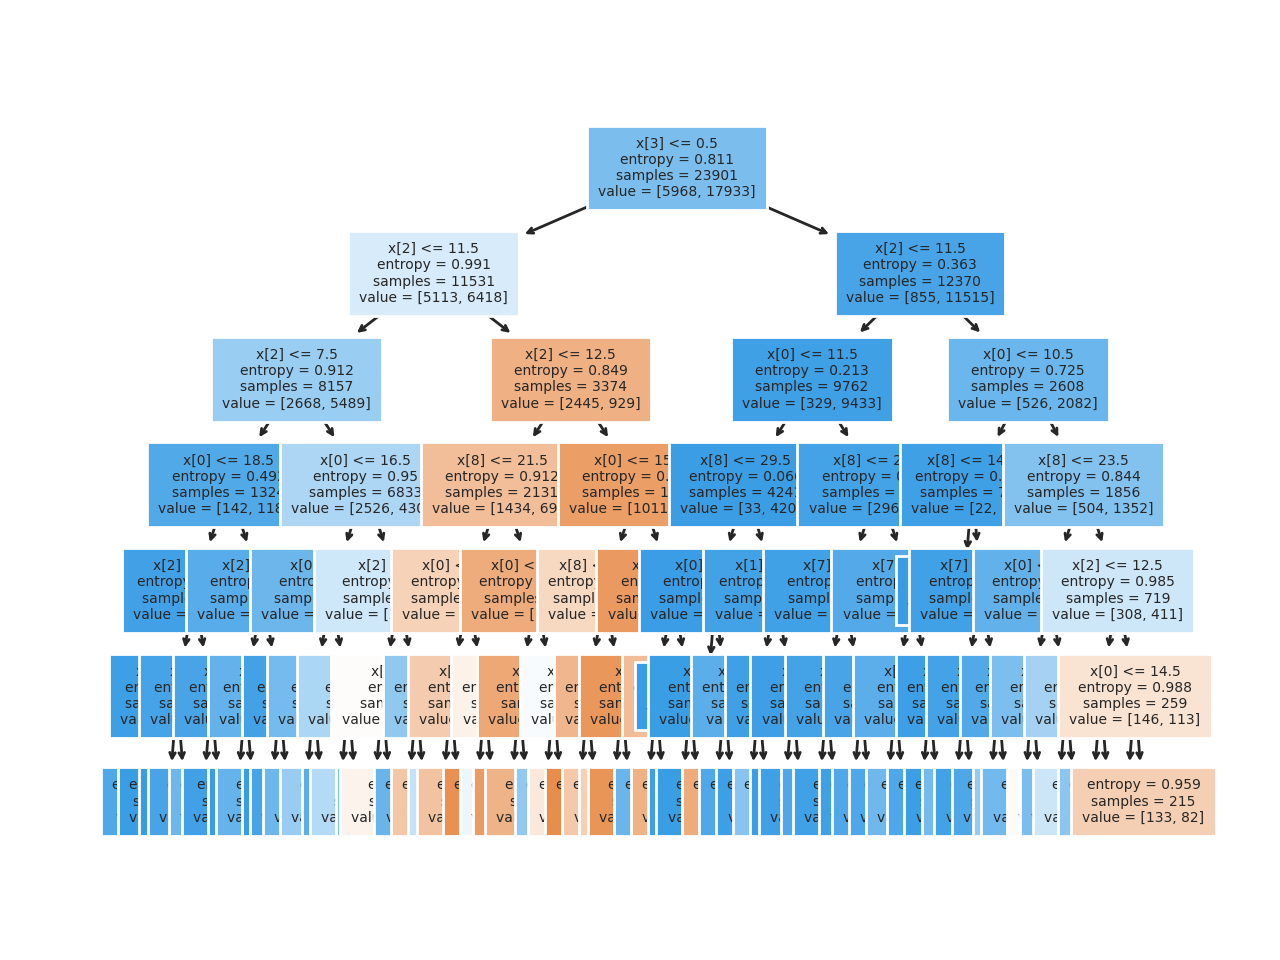

In [ ]:
#Ploteo del árbol

tree.plot_tree(modeloArbol, filled=True, fontsize=5)
plt.savefig("mi_arbol.jpg")
plt.show

In [ ]:
modeloArbol.max_features_

10

In [ ]:
df.columns

Index(['edad', 'clase_trabajo', 'num_educacion', 'estado_civil', 'ocupacion',
       'relacion', 'raza', 'sexo', 'horas_por_semana', 'pais_natal',
       'ingreso'],
      dtype='object')

In [ ]:
# Construir y entrenar el modelo de árbol de decisión
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Obtener las importancias de las características
feature_importances = decision_tree_model.feature_importances_

In [ ]:
# Crear un DataFrame para visualizar las importancias de las características
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

            Feature  Importance
0              edad    0.240487
3      estado_civil    0.218713
2     num_educacion    0.179974
8  horas_por_semana    0.117358
4         ocupacion    0.102905
1     clase_trabajo    0.051397
5          relacion    0.030458
6              raza    0.028766
9        pais_natal    0.019121
7              sexo    0.010822


In [ ]:
print(tree.export_text(modeloArbol, feature_names = ['edad', 'clase_trabajo', 'num_educacion', 'estado_civil', 'ocupacion',
       'relacion', 'raza', 'sexo', 'horas_por_semana', 'pais_natal']))

|--- estado_civil <= 0.50
|   |--- num_educacion <= 11.50
|   |   |--- num_educacion <= 7.50
|   |   |   |--- edad <= 18.50
|   |   |   |   |--- num_educacion <= 4.50
|   |   |   |   |   |--- clase_trabajo <= 2.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- clase_trabajo >  2.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- num_educacion >  4.50
|   |   |   |   |   |--- raza <= 3.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- raza >  3.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- edad >  18.50
|   |   |   |   |--- num_educacion <= 3.50
|   |   |   |   |   |--- clase_trabajo <= 1.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- clase_trabajo >  1.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- num_educacion >  3.50
|   |   |   |   |   |--- horas_por_semana <= 1.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- horas_por_semana >  1.00
|   |   |   |   |   |   |--- class: 1
|   |

In [ ]:
modeloArbol.score(X_test,y_test)

0.822289156626506

In [ ]:
#Predicciones

y_predictA=modeloArbol.predict(X_test)

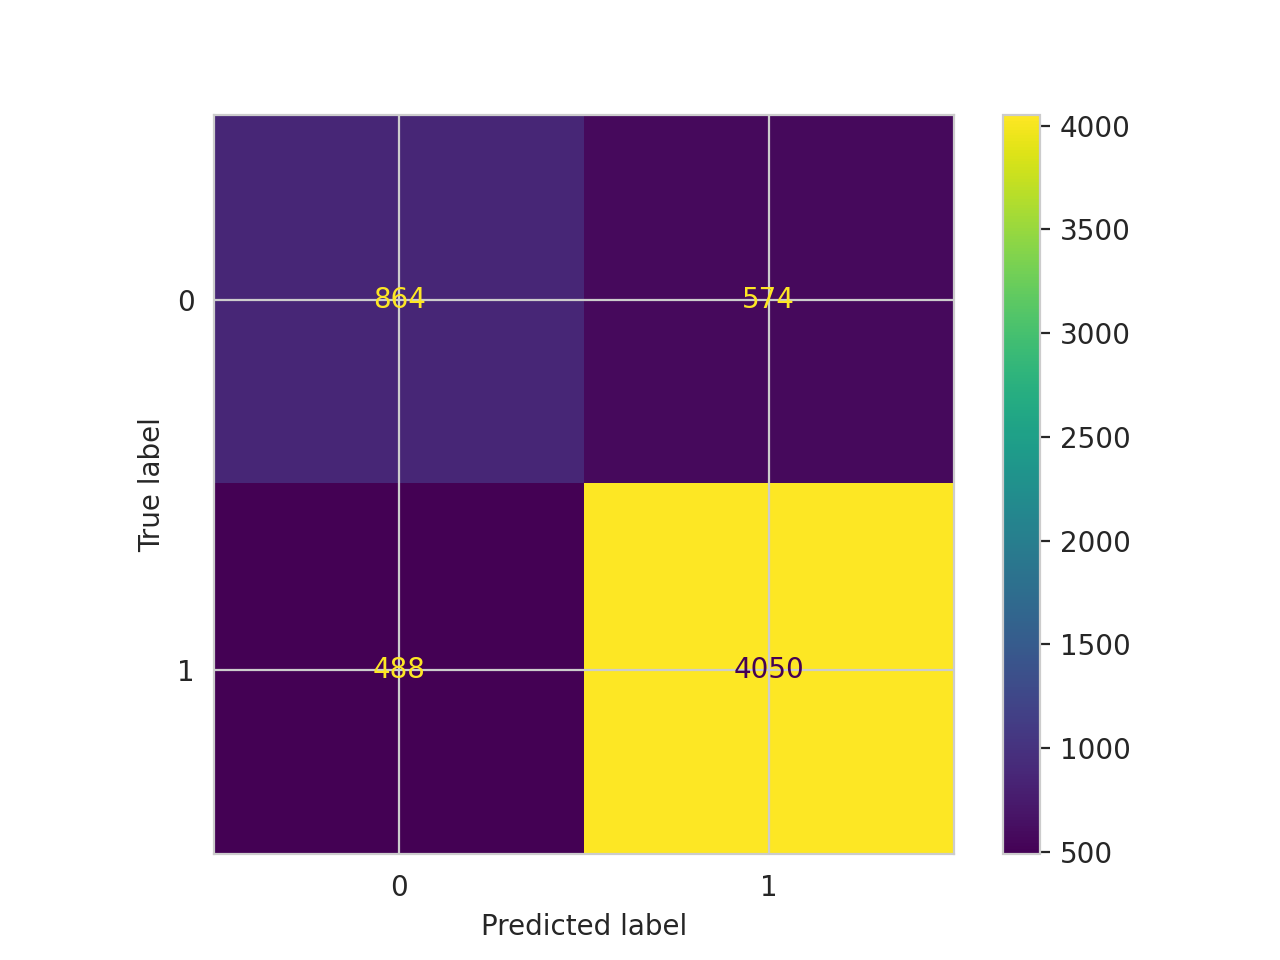

In [ ]:
matrix=confusion_matrix(y_test,y_predictA)
mostrarMatrix=ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=modeloArbol.classes_)
mostrarMatrix.plot()

Se puede evidenciar los siguientes resultados en la matriz de confusión:


*   Verdaderos negativos: 864
*   Verdaderos positivos: 4050
*   Falsos negativos: 574
*   Falsos positivos: 488


In [ ]:
y_predictnb=modeloNB.predict(X_test)
y_predictdt=modeloArbol.predict(X_test)

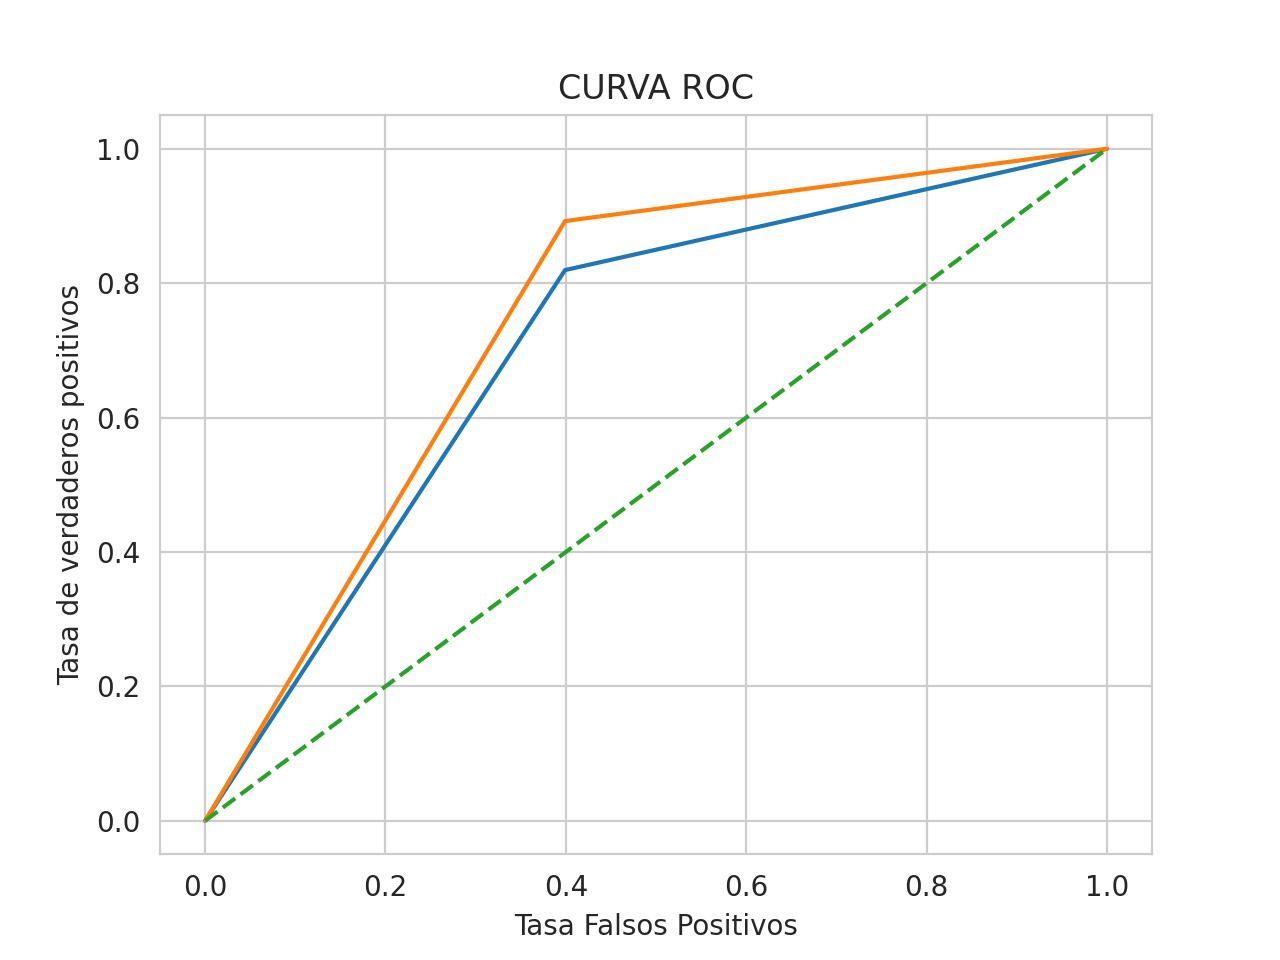

In [ ]:
fpr, tprnb, umbral=roc_curve(y_test,y_predictnb)
fpr, tprdt, umbral=roc_curve(y_test,y_predictdt)
plt.plot(fpr,tprnb)
plt.plot(fpr,tprdt)
plt.plot([0,1],[0,1],"--")
plt.xlabel("Tasa Falsos Positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("CURVA ROC")
plt.show()

In [ ]:
print("Área bajo la curva", auc(fpr,tprnb))

Área bajo la curva 0.7101792558711447


In [ ]:
print("Área bajo la curva", auc(fpr,tprdt))

Área bajo la curva 0.746649066360347


# **MODELO BOSQUE ALEATORIO:**
Este modelo es un tanto robusto, donde se construyen múltiples árboles de decisión utilizando un proceso de muestreo aleatorio de datos y características, y combina las predicciones individuales de cada árbol para producir una predicción final.

In [126]:
#Declarar bosque aleatorio
modeloBosque = RandomForestClassifier(n_estimators=8,
                                      criterion="gini",
                                      bootstrap=True,
                                      max_features="sqrt",
                                      max_samples=3/4,
                                      oob_score=True,
                                      random_state=10)

In [127]:
#Entrenar
modeloBosque.fit(X_train,y_train)

RandomForestClassifier(max_samples=0.75, n_estimators=8, oob_score=True,
                       random_state=10)

In [128]:
modeloBosque.score(X_test,y_test)

0.8135876840696118

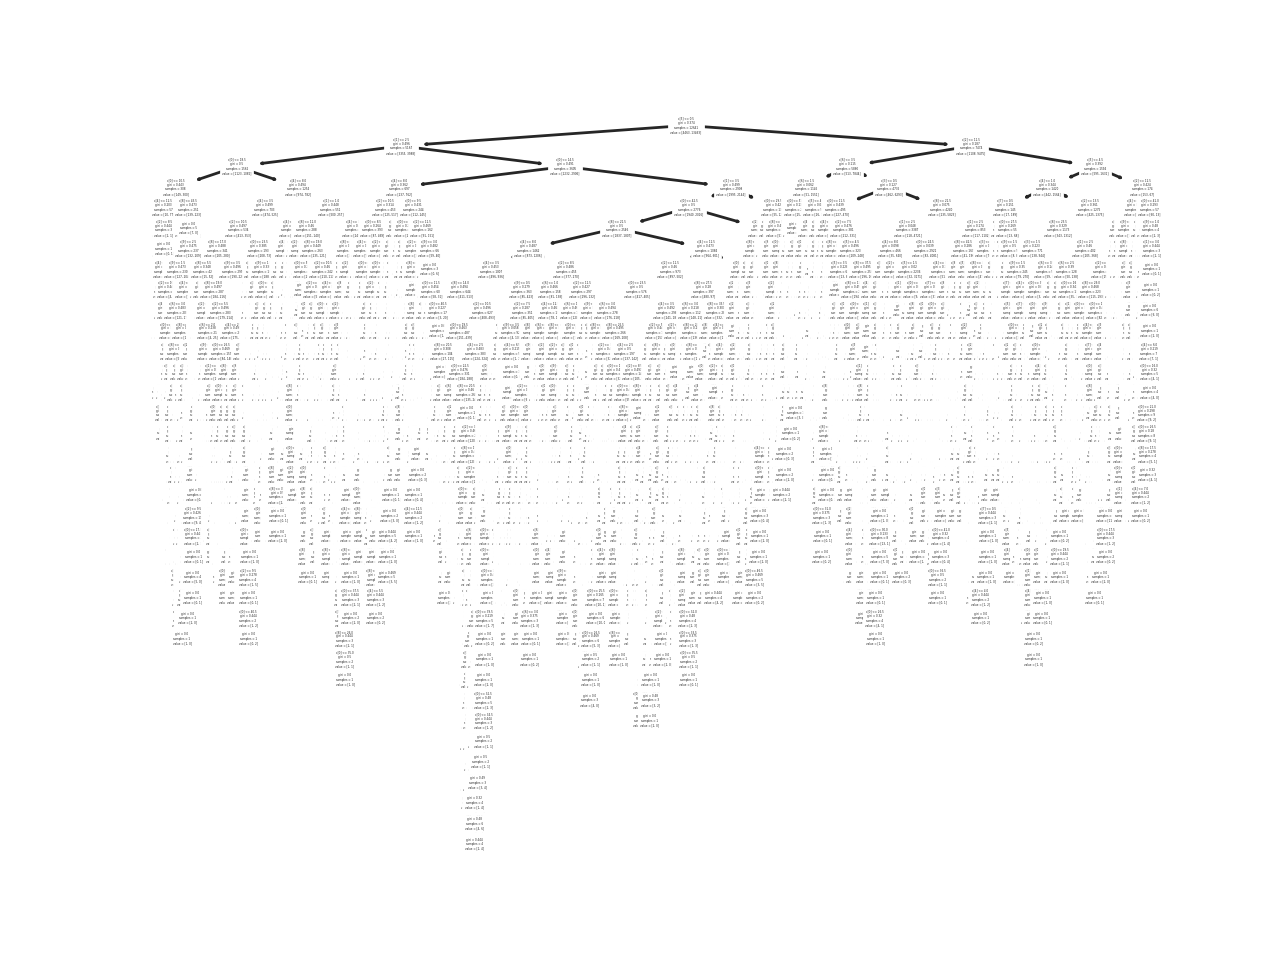

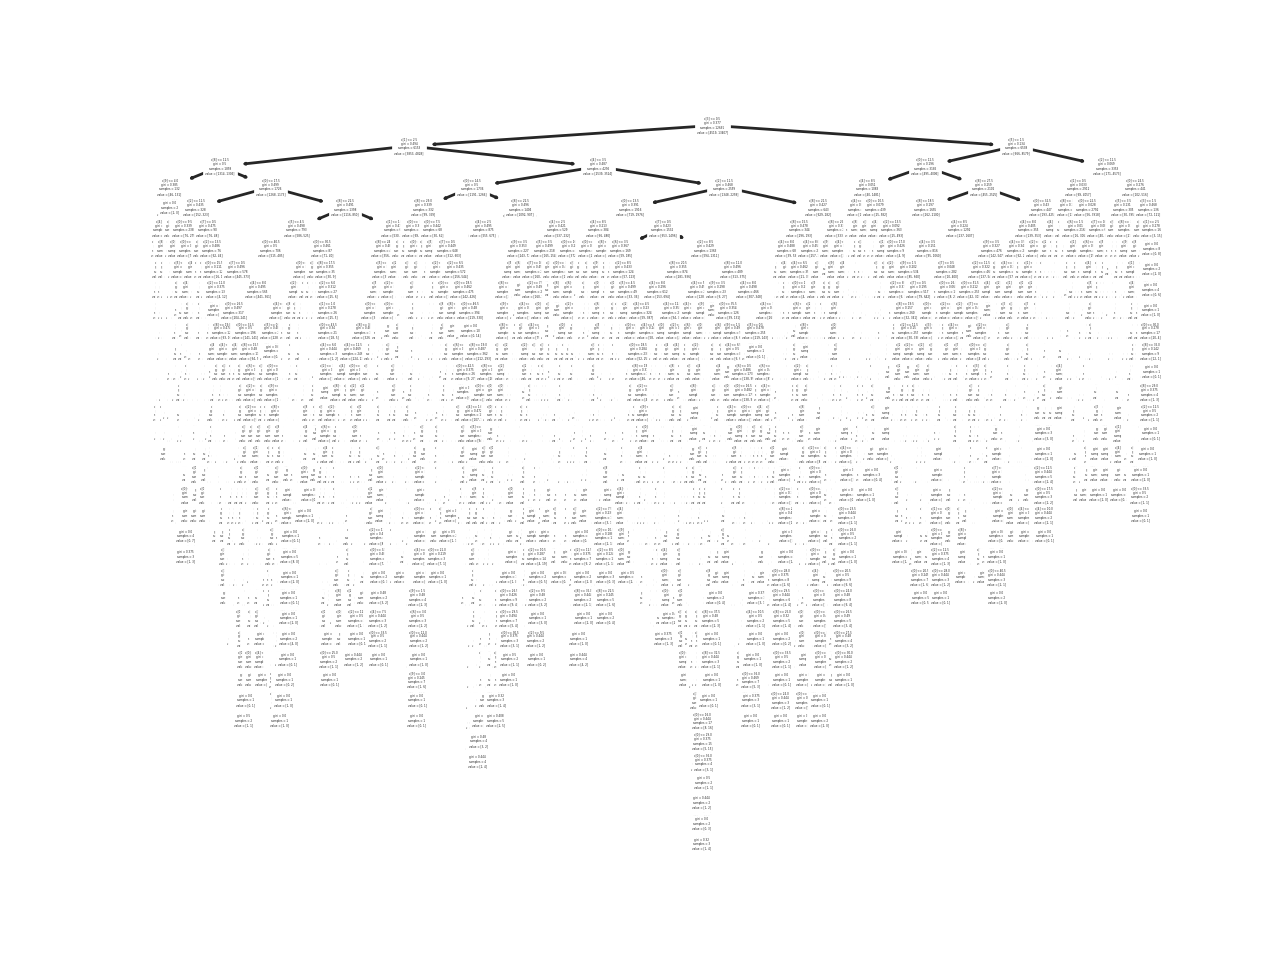

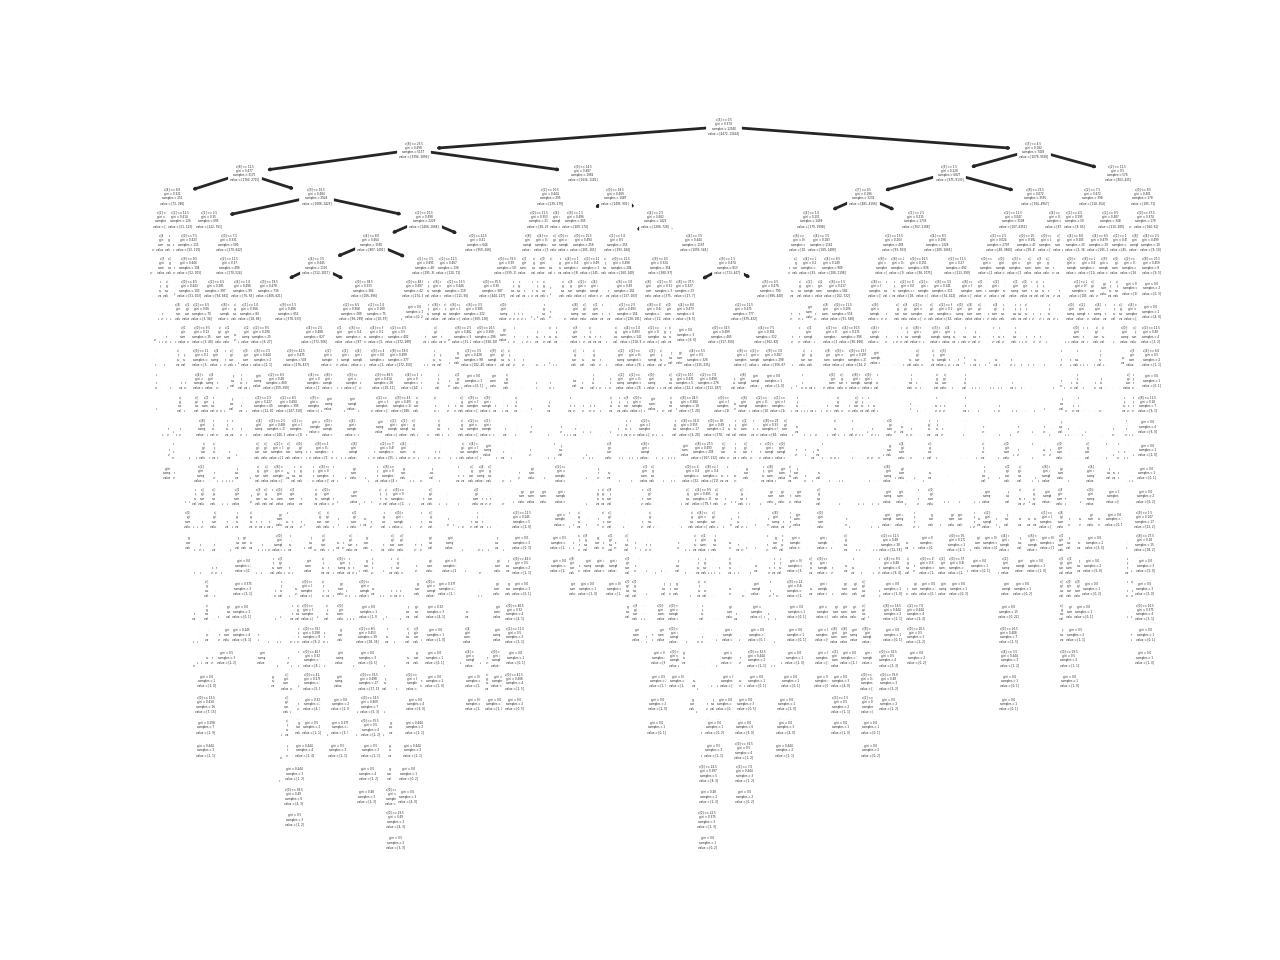

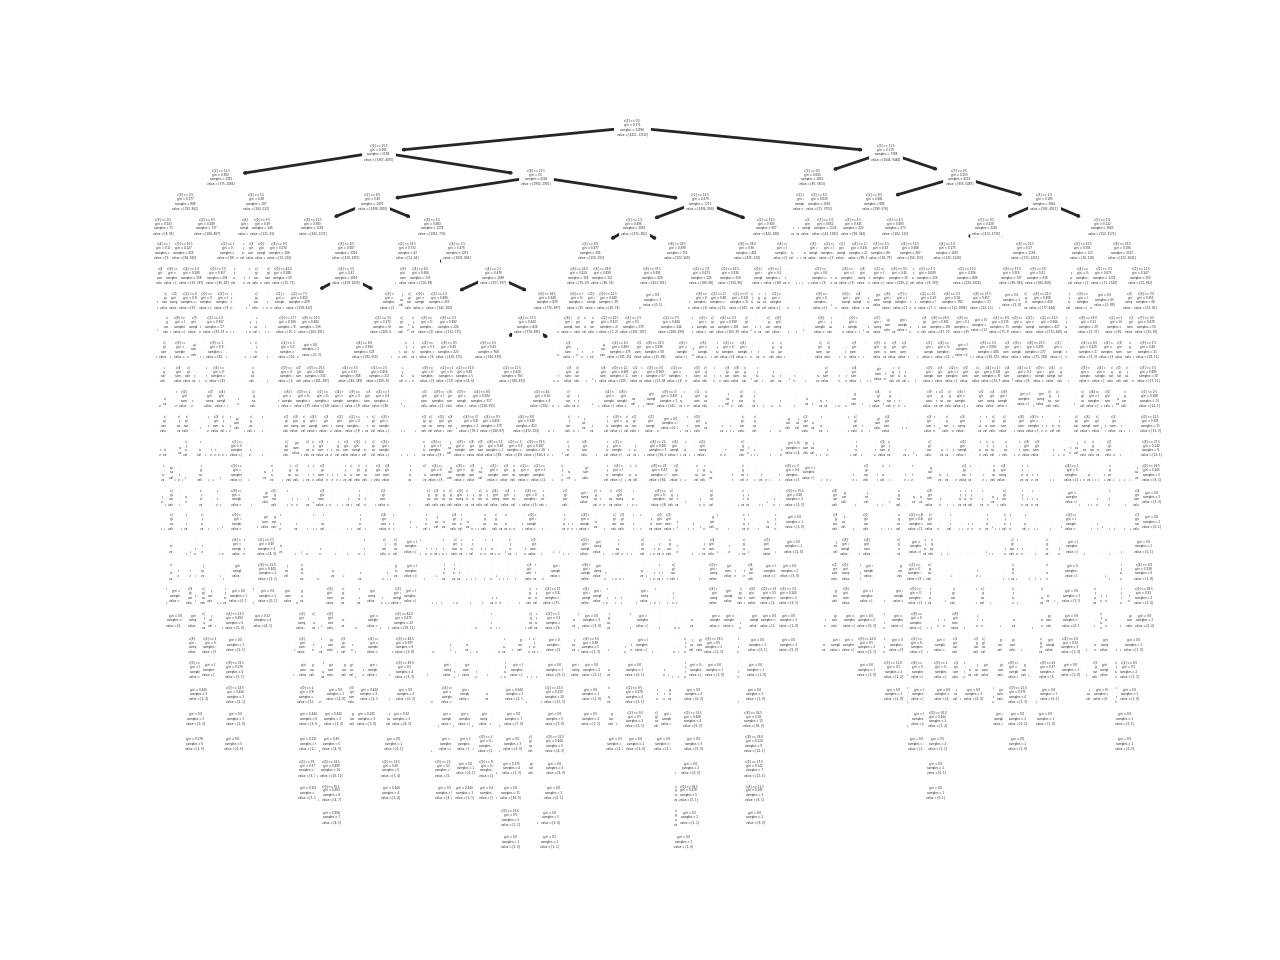

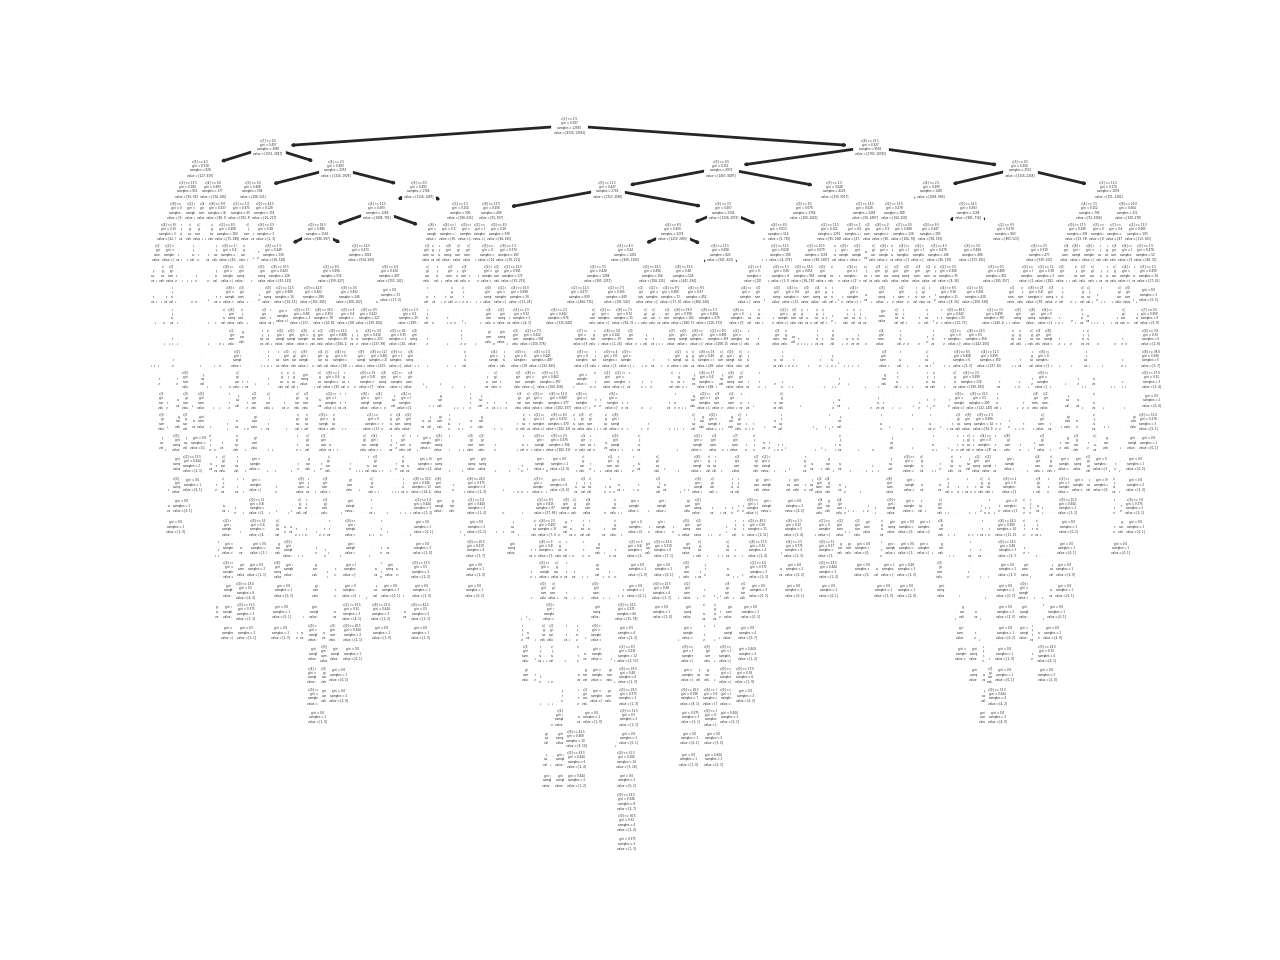

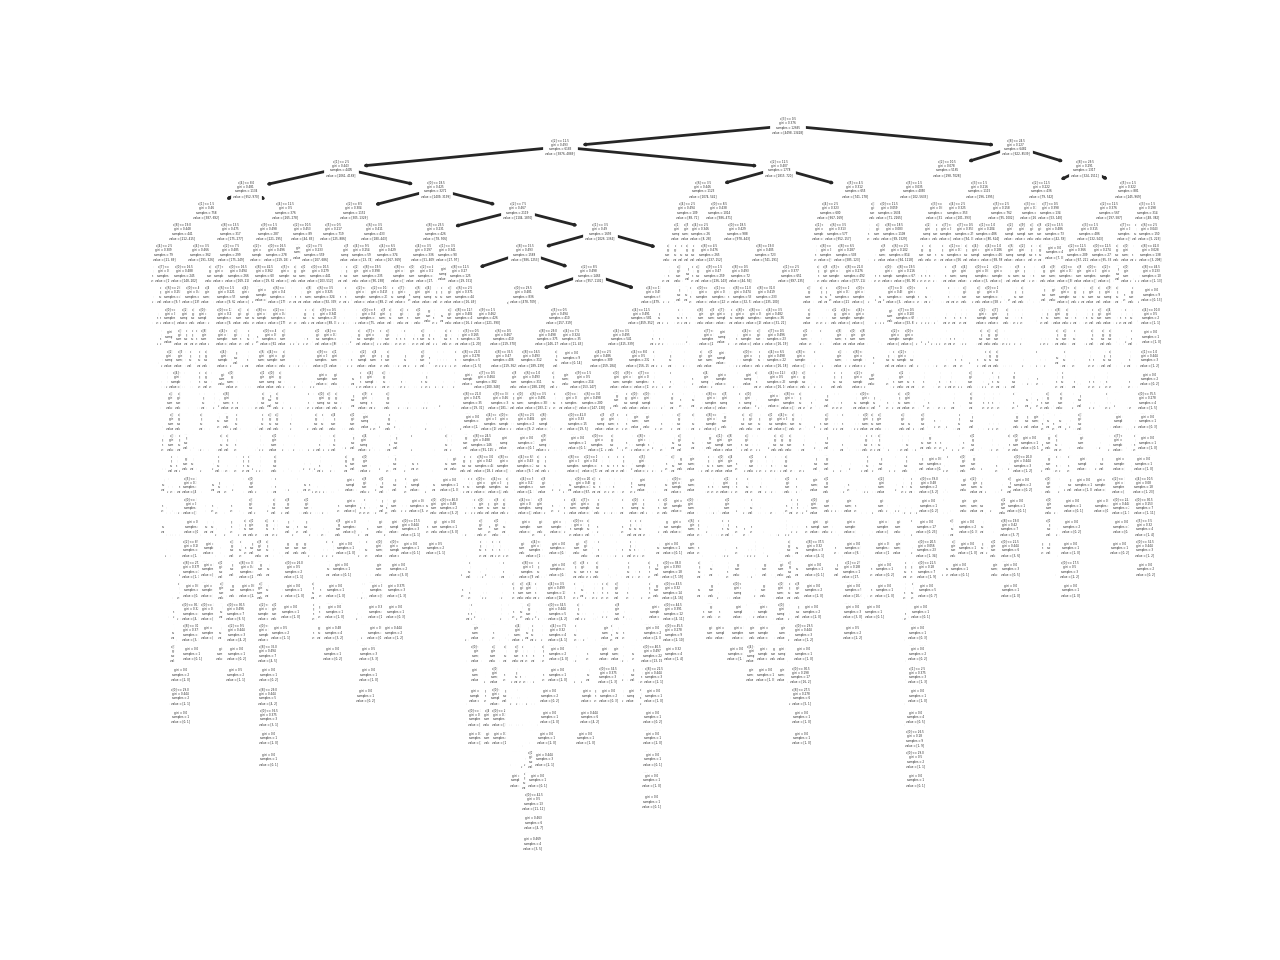

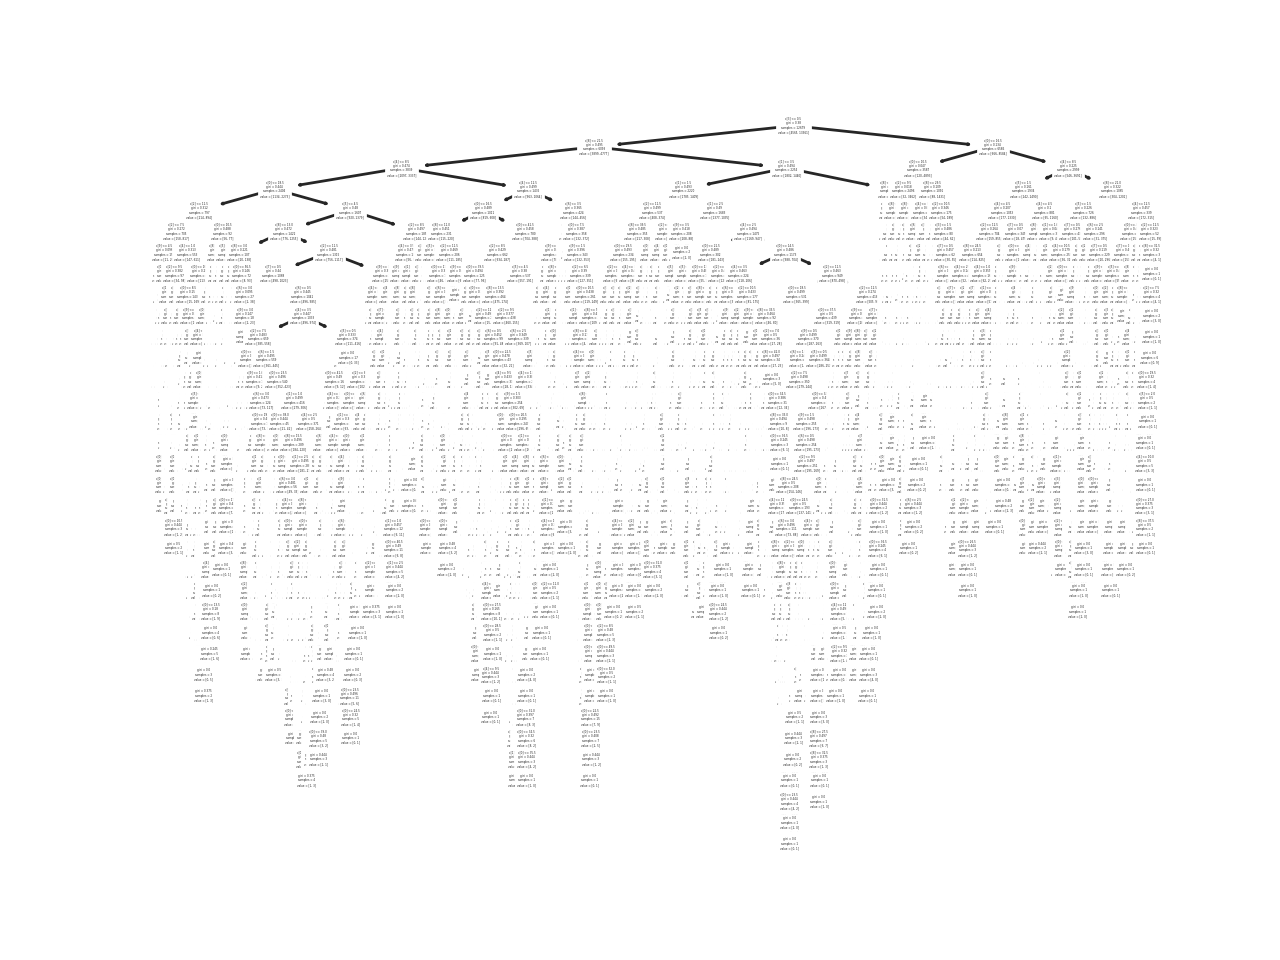

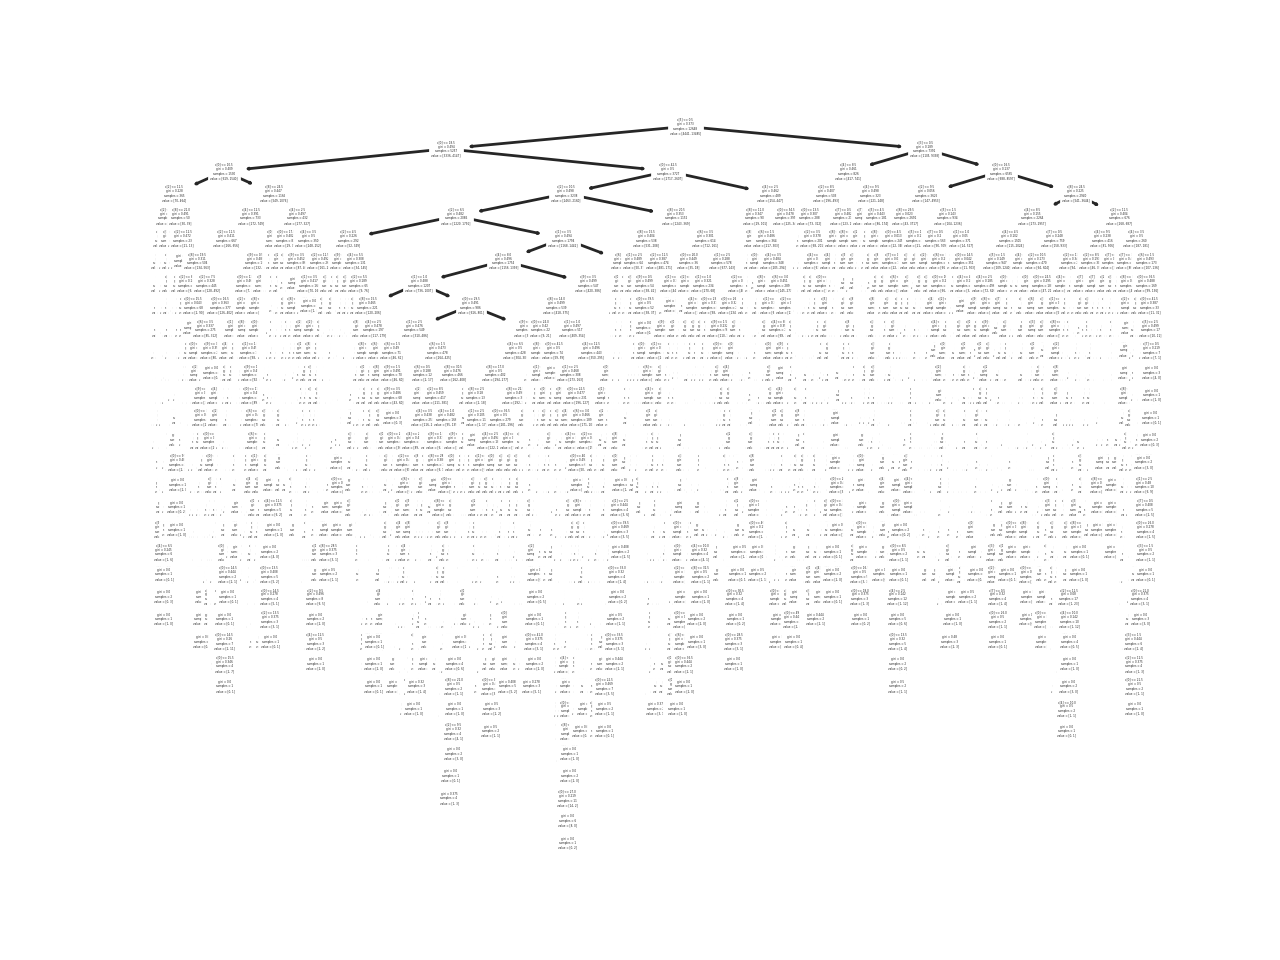

In [131]:
for i in modeloBosque.estimators_:
    tree.plot_tree(i)
    plt.show()

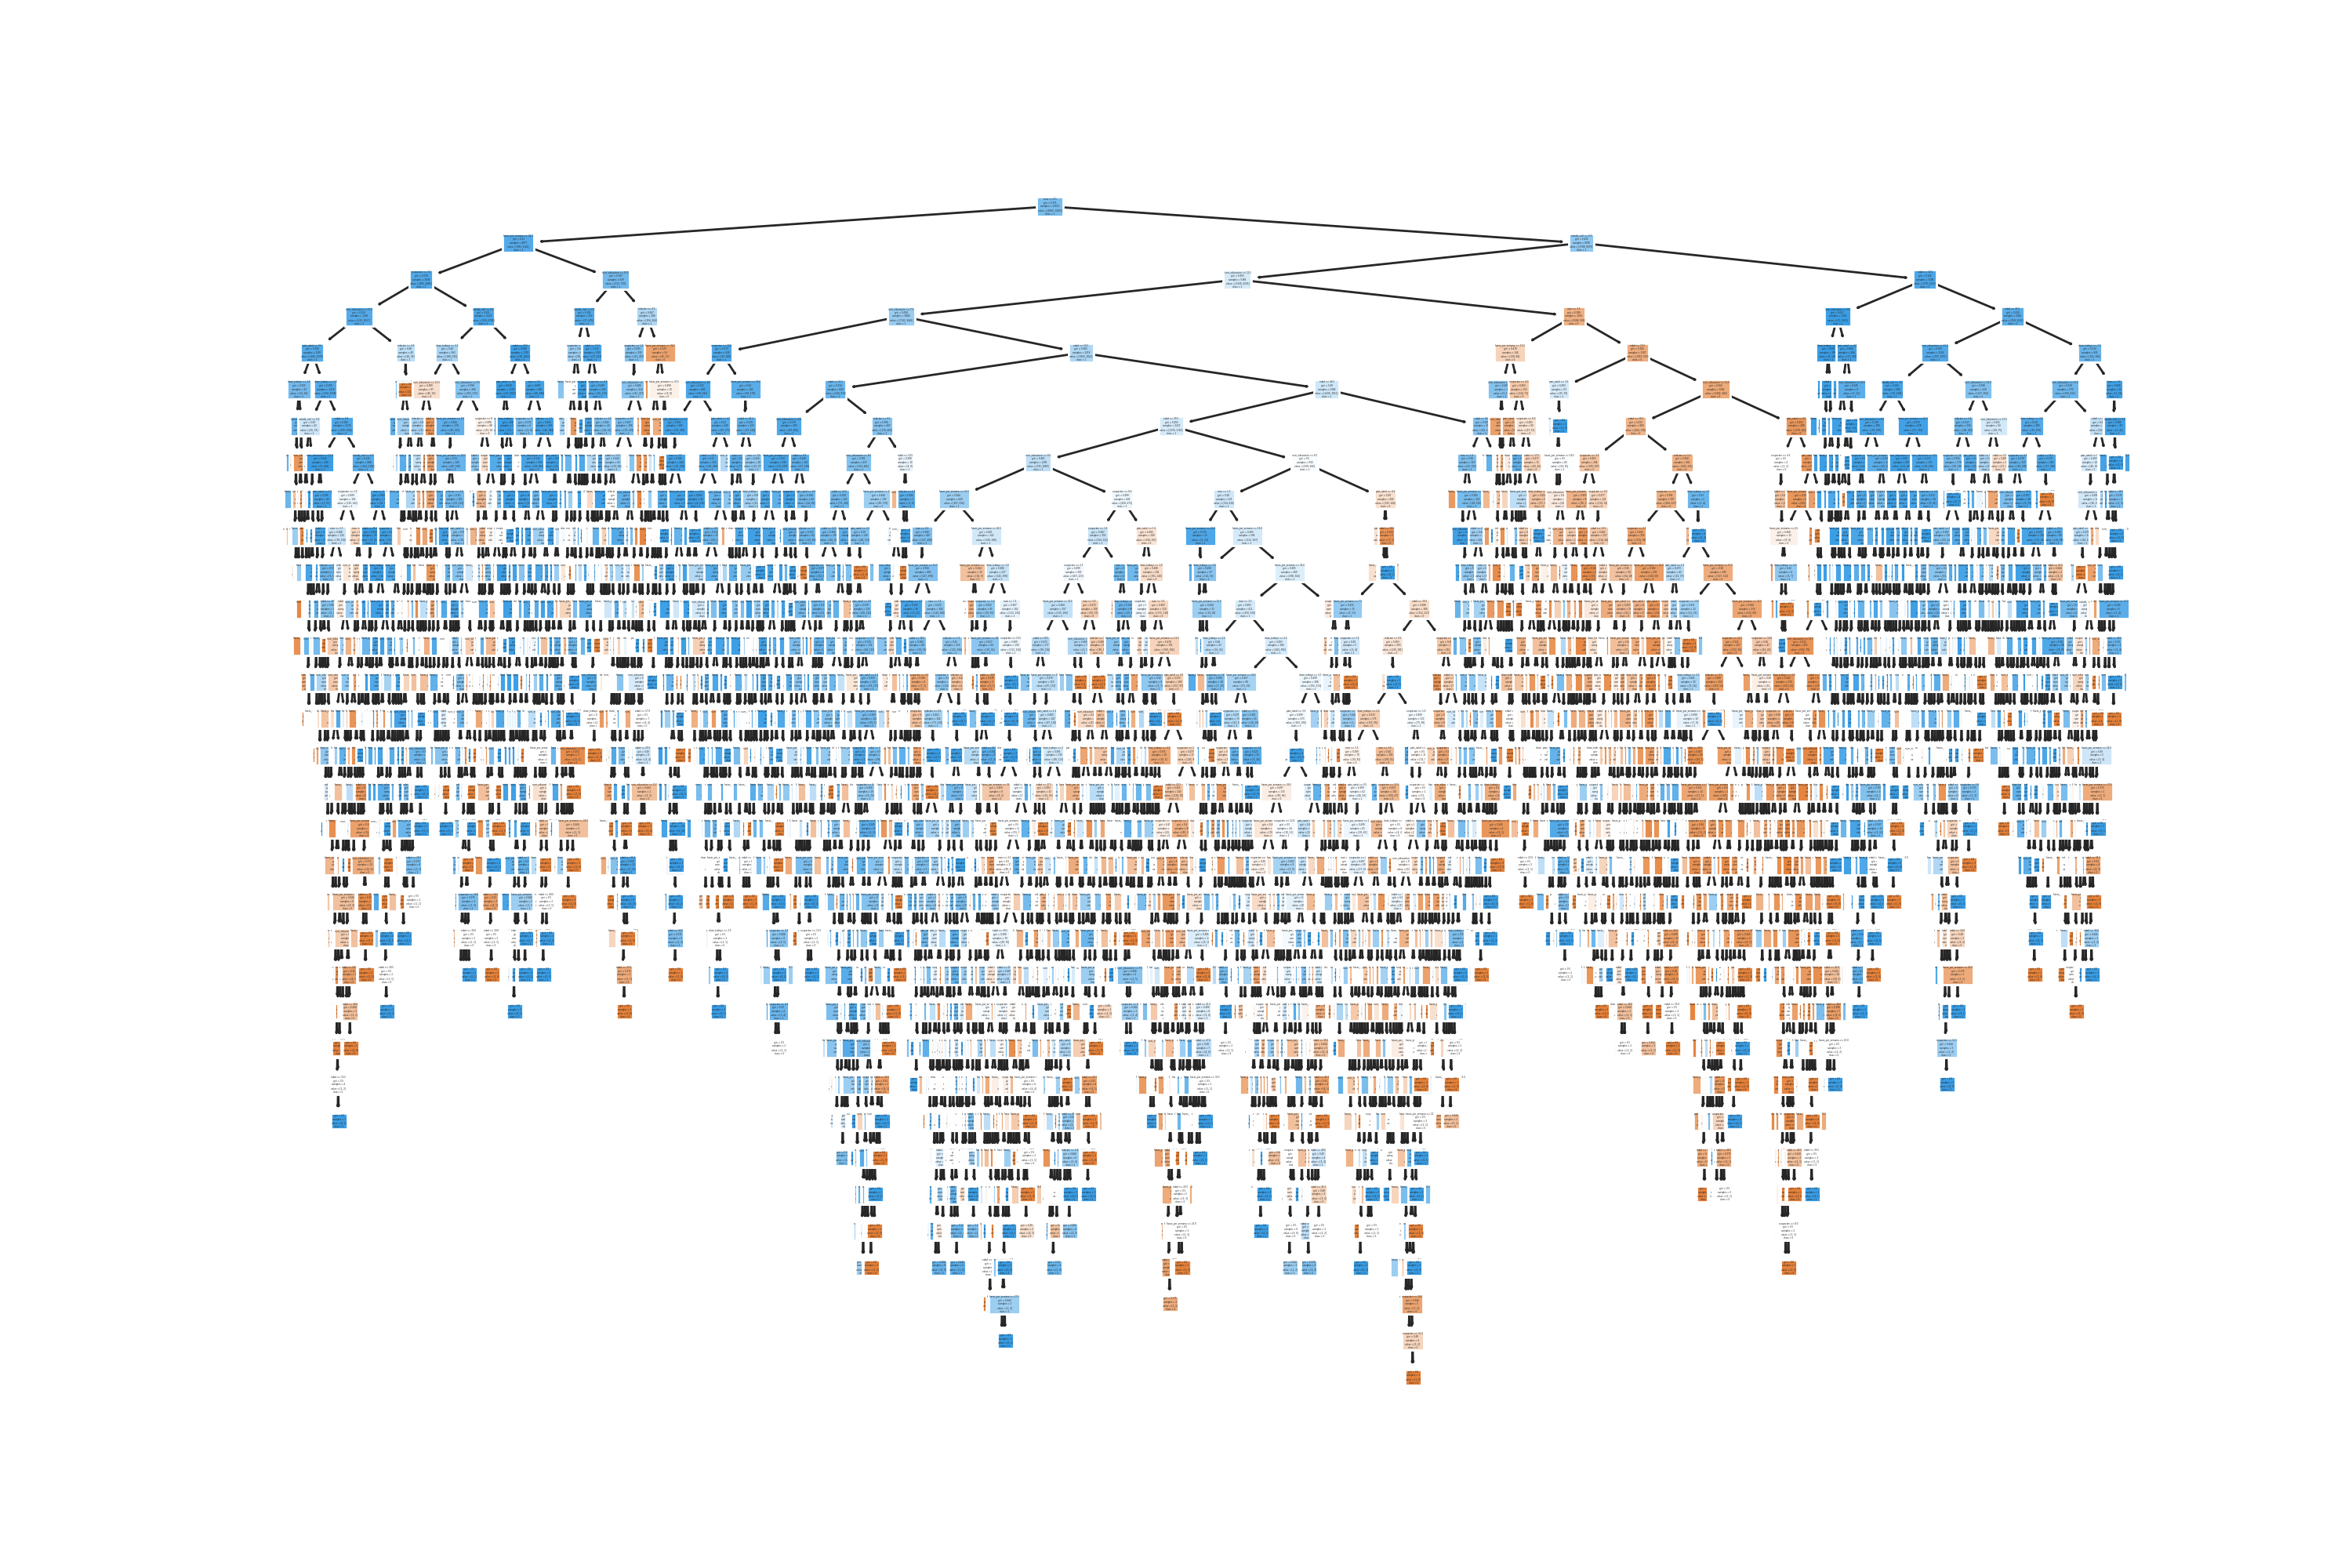

In [130]:
#Visualización un poco más organizada del árbol
# Convertir nombres de características y clases a cadenas
feature_names_str = [str(feature) for feature in X.columns]
class_names_str = [str(clase) for clase in modeloBosque.classes_]

# Plotear el árbol
plt.figure(figsize=(15, 10))
tree.plot_tree(arbol, feature_names=feature_names_str, class_names=class_names_str, filled=True)
plt.show()

In [132]:
jb.dump(modeloBosque,"modelobosque.bin")

['modelobosque.bin']

In [133]:
#Predicción

y_predict=modeloBosque.predict(X_test)
y_predict

array([0, 1, 1, ..., 1, 1, 0])

In [134]:
# Comparación de Score

print(modeloBosque.score(X_test,y_test),modeloArbol.score(X_test,y_test))

0.8135876840696118 0.822289156626506


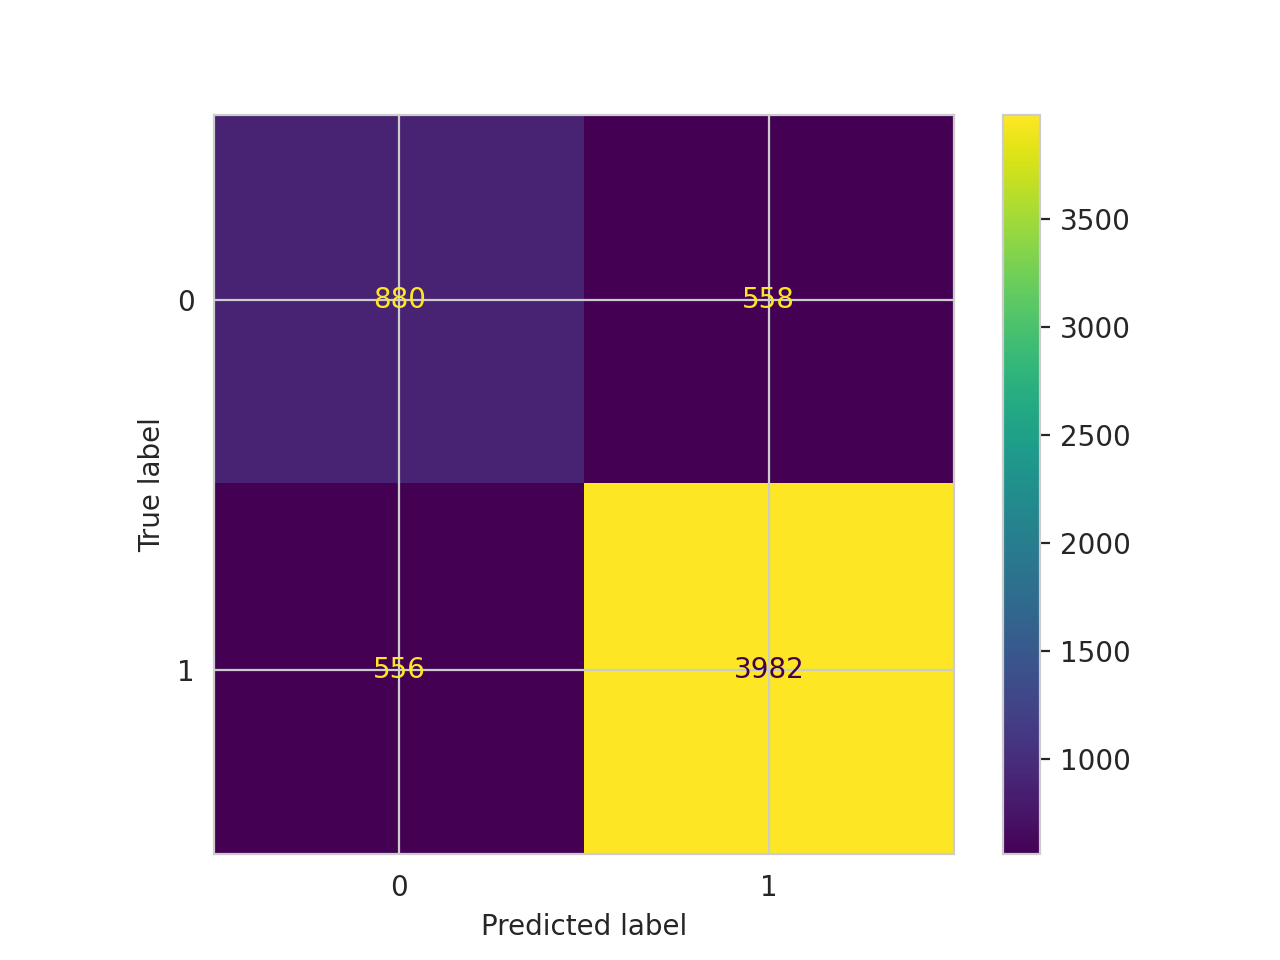

In [135]:
#Matriz de confusión

matrix=confusion_matrix(y_test,y_predict)
mostrarMatrix=ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=modeloBosque.classes_)
mostrarMatrix.plot()

In [136]:
print('Acurracy de entrenamiento', modeloBosque.score(X_train,y_train))
print('Acurracy de datos de prueba', modeloBosque.score(X_test,y_test))
print('Acurracy de validaci+ón (OOBs)', modeloBosque.oob_score_)

Acurracy de entrenamiento 0.9383707794652943
Acurracy de datos de prueba 0.8135876840696118
Acurracy de validaci+ón (OOBs) 0.7856156646165432


In [137]:
train_score=[]
oob_score=[]

estimadores=range(10,100,1)

for estimador in estimadores:
  modeloBosque = RandomForestClassifier(n_estimators=estimador,
                                          criterion="gini",
                                          bootstrap=True,
                                          max_features="sqrt",
                                          max_samples=3/4,
                                          oob_score=True,
                                          random_state=99999)
  modeloBosque.fit(X_train,y_train)
  train_score.append(modeloBosque.score(X_test,y_test))
  oob_score.append(modeloBosque.oob_score_)


El valor recomendado (numero arboles): 95


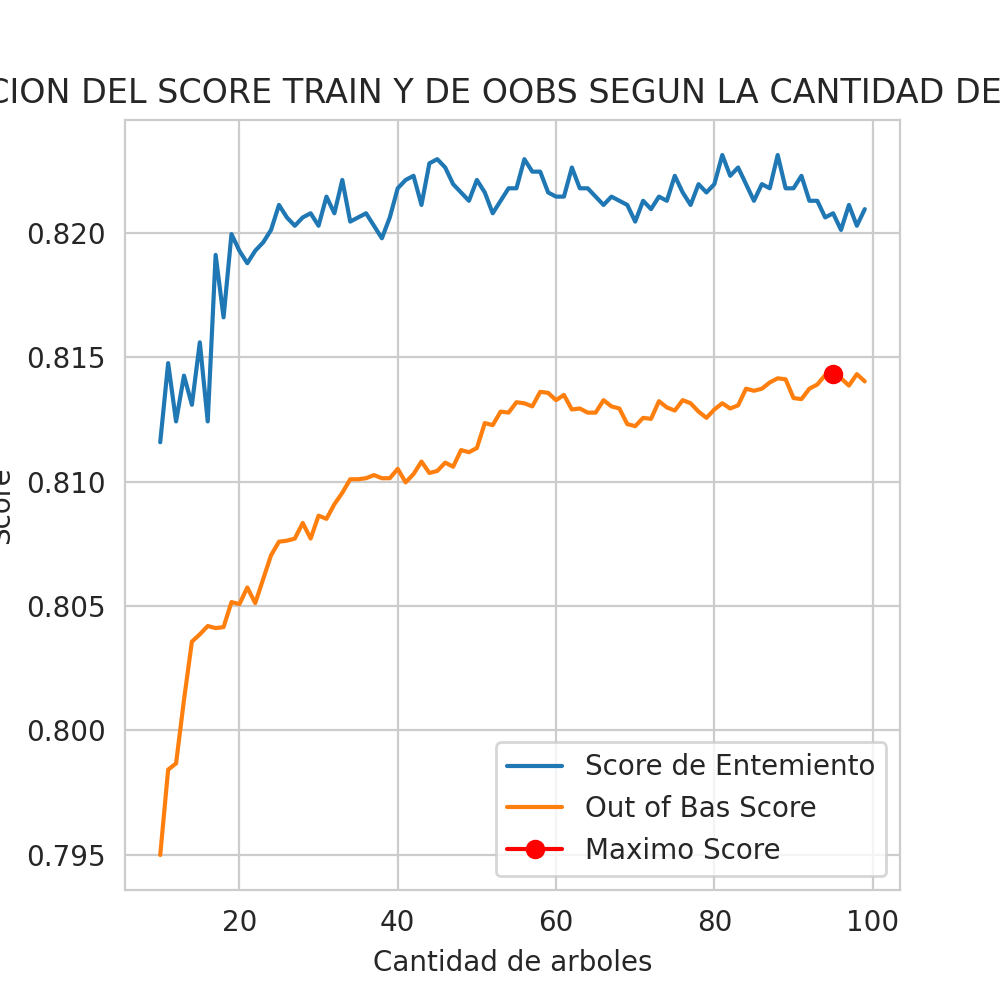

In [138]:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(estimadores,train_score,label="Score de Entemiento")
ax.plot(estimadores,oob_score,label="Out of Bas Score")
ax.plot(estimadores[np.argmax(oob_score)], max(oob_score), marker="o",color="red",label="Maximo Score")
ax.set_ylabel('Score')
ax.set_xlabel("Cantidad de arboles")
ax.set_title("EVALUACION DEL SCORE TRAIN Y DE OOBS SEGUN LA CANTIDAD DE ARBOLES")
plt.legend()
print(f"El valor recomendado (numero arboles): {estimadores[np.argmax(oob_score)]}")

In [139]:
importancia=modeloBosque.feature_importances_

In [140]:
modeloBosque.feature_names_in_

array(['edad', 'clase_trabajo', 'num_educacion', 'estado_civil',
       'ocupacion', 'relacion', 'raza', 'sexo', 'horas_por_semana',
       'pais_natal'], dtype=object)

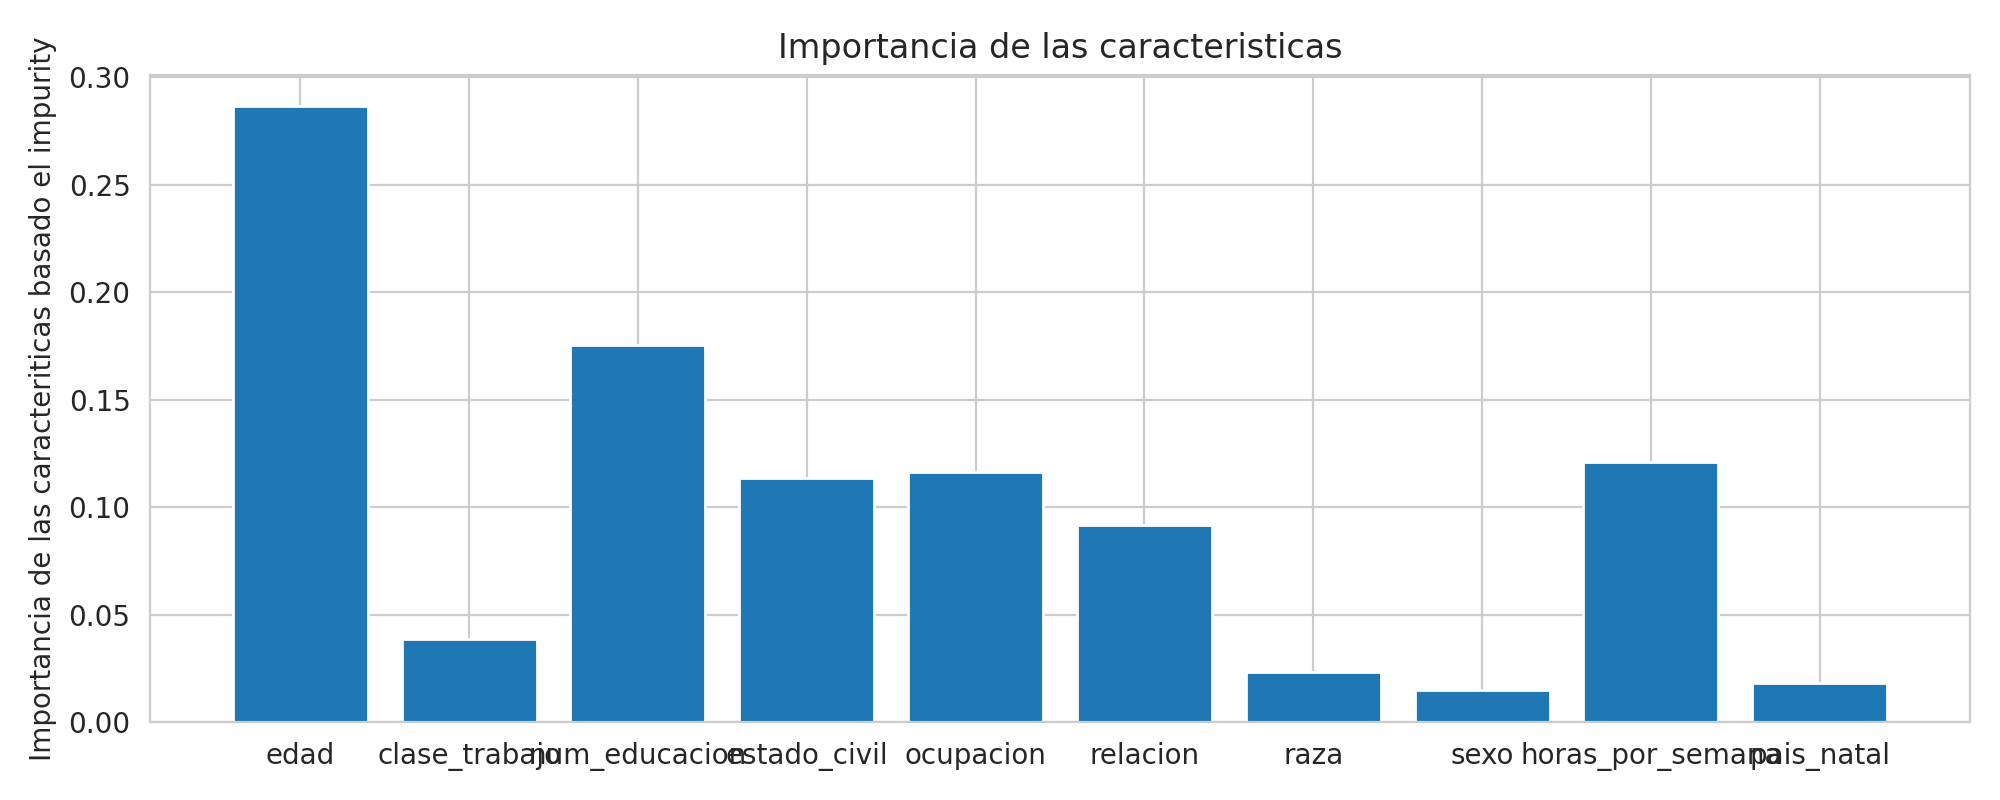

In [141]:
features=['edad', 'clase_trabajo', 'num_educacion', 'estado_civil',
       'ocupacion', 'relacion', 'raza', 'sexo', 'horas_por_semana',
       'pais_natal']

importancia_pronostico=pd.Series(importancia,index=features)
fig,ax=plt.subplots(figsize=(10,4))
ax.bar(features,importancia)
ax.set_title("Importancia de las caracteristicas")
ax.set_ylabel("Importancia de las caracteriticas basado el impurity")
fig.tight_layout()

# **MODELO XGBOOST**
 XGBoost construye un conjunto de árboles de decisión secuenciales, donde cada árbol intenta corregir los errores del anterior. Utiliza un algoritmo de optimización basado en gradientes para minimizar una función de pérdida, lo que le permite aprender de manera eficiente relaciones complejas en los datos.

In [142]:
#Importar el XGBoost
import xgboost as xgb

# Crear regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [143]:
# Defina hyperparameters
params = {"model__learning_rate": 0.1,
          "model__n_estimators": 90,
          "objective":'binary:logistic'}

In [146]:
#Evaluaciones para el entrenamiento
evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]

In [151]:
#Entrenamiento del modelo
n = 1000
modeloXGBoost = xgb.train(params=params,
                          dtrain=dtrain_reg,
                          num_boost_round=n,
                          evals=evals,
                          verbose_eval=50)

[0]	validation-logloss:0.46930	train-logloss:0.47311
[50]	validation-logloss:0.34712	train-logloss:0.30528
[100]	validation-logloss:0.35454	train-logloss:0.28431
[150]	validation-logloss:0.36308	train-logloss:0.26749
[200]	validation-logloss:0.36975	train-logloss:0.25457
[250]	validation-logloss:0.37778	train-logloss:0.24196
[300]	validation-logloss:0.38696	train-logloss:0.23151
[350]	validation-logloss:0.39426	train-logloss:0.22390
[400]	validation-logloss:0.40216	train-logloss:0.21543
[450]	validation-logloss:0.40954	train-logloss:0.20844
[500]	validation-logloss:0.41744	train-logloss:0.20149
[550]	validation-logloss:0.42560	train-logloss:0.19602
[600]	validation-logloss:0.43382	train-logloss:0.19048
[650]	validation-logloss:0.44092	train-logloss:0.18517
[700]	validation-logloss:0.44738	train-logloss:0.18141
[750]	validation-logloss:0.45265	train-logloss:0.17807
[800]	validation-logloss:0.45764	train-logloss:0.17569
[850]	validation-logloss:0.46254	train-logloss:0.17283
[900]	validat

In [152]:
n = 50
modeloXGBoost = xgb.train(params=params,
                          dtrain=dtrain_reg,
                          num_boost_round=n)

In [153]:
preds = modeloXGBoost.predict(dtest_reg)
preds

array([0.7157216 , 0.9944073 , 0.99872476, ..., 0.67139375, 0.9507281 ,
       0.2655812 ], dtype=float32)

In [154]:
prediccion=np.absolute(np.round(preds, decimals=0, out=None))
prediccion

array([1., 1., 1., ..., 1., 1., 0.], dtype=float32)

In [155]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediccion)

0.8442101740294511